# Homework 1
*This notebook includes both coding and written questions. Please hand in this notebook file with all the outputs and your answers to the written questions.*

This assignment covers linear filters, convolution and correlation

In [1]:
# Setup
import numpy as np
import matplotlib.pyplot as plt
from time import time
from skimage import io

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

## Part 1: Convolutions
### 1.1 Commutative Property (10 points)
Recall that the convolution of an image $f:\mathbb{R}^2\rightarrow \mathbb{R}$ and a kernel $h:\mathbb{R}^2\rightarrow\mathbb{R}$ is defined as follows:
$$(f*h)[m,n]=\sum_{i=-\infty}^\infty\sum_{j=-\infty}^\infty f[i,j]\cdot h[m-i,n-j]$$

Or equivalently,
\begin{align}
(f*h)[m,n] &= \sum_{i=-\infty}^\infty\sum_{j=-\infty}^\infty h[i,j]\cdot f[m-i,n-j]\\
&= (h*f)[m,n]
\end{align}

Show that this is true (i.e. prove that the convolution operator is commutative: $f*h = h*f$).

**Your Answer:** *make it in my notebook its allright =) [LaTex equations](http://jupyter-notebook.readthedocs.io
/en/latest/examples/Notebook/Typesetting%20Equations.html).*

### 1.2 Linear and Shift Invariance (10 points)
Let $f$ be a function $\mathbb{R}^2\rightarrow\mathbb{R}$. Consider a system $f\xrightarrow{s}g$, where $g=(f*h)$ with some kernel $h:\mathbb{R}^2\rightarrow\mathbb{R}$. Show that $S$ defined by any kernel $h$ is a Linear Shift Invariant (LSI) system. In other words, for any $h$, show that $S$ satisfies both of the following:
- $S[a\cdot{f_1}+b\cdot{f_2}]= a\cdot{S[f_1]}+b\cdot{S[f_2]}$
- If $f[m,n]\xrightarrow{s}g[m,n]$ then $f[m-m_0,n-n_0]\xrightarrow{s}g[m-m_0,n-n_0]$

**Your Answer:** *as previos task [LaTex equations](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html).*

### 1.3 Implementation (30 points)

In this section, you will implement two versions of convolution:
- `conv_nested`
- `conv_fast`

First, run the code cell below to load the image to work with.

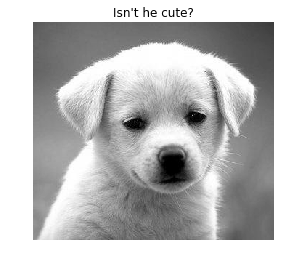

In [2]:
# Open image as grayscale
img = io.imread('dog.jpg', as_grey=True)

# Show image
plt.imshow(img)
plt.axis('off')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARwAAAEICAYAAACNs0ttAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzsvVmMZNl5Jvbd2Pc9MnLPrKzK2rq6utkbW4RIkTRFEnbTFCjTNinAalg2IOnBMw/GDGD4gV5hA57xw9hPtgXCEgzLsgHBEkhLImlySGoo0WpWVXdXd+25Z2Ts+x5x/ZD1/XXi1L2RkdlbNpk/kMjMiHvPPfcs//L9yzFM08QZndEZndGHQY6PugNndEZn9KtDZwznjM7ojD40OmM4Z3RGZ/Sh0RnDOaMzOqMPjc4Yzhmd0Rl9aHTGcM7ojM7oQ6MzhnNGJybDML5lGMaffNT9OKOPD50xnF8SMgxjwzCML7zHNl43DOPbj/9eNQzDNAzD9b508AOi4zI9wzD+LcMwfmEYRs0wjBuGYbzyQfbvjMbpjOGc0a8azQH4DwHEAfxvAL79kfbmV4zOGM4vIRmGccEwjB8ZhlE1DKNgGMafKt+ZhmH8vmEY9wzDqBiG8T8ahmFYNPMvH/+uGIbRMAzj12we5zEM4381DKNuGMbbhmG8pDxr3jCM/8swjLxhGI8Mw/iPJvTZbxjGPzMMY/Nxv3/y+LPPGoaxo127YRjGFwzD+DKA/wTAv/O4jzcffx81DON/MQxj3zCMXcMw/kvDMJwAYJrmvzBN8/8zTXMI4McAMlMM6Rm9T3TGcH456b8A8Nc4lOKLAP6F9v1rAF4GcB3Avw3gSwBgmua3TdN8/fE1n3n8O2aaZsg0zX9l86x/E8D/DiAG4P8G8D8AgGEYDgB/AeAmgAUA/xqAf2wYxpds2vnvALwI4FMAEgD+CYDRpJc0TfP/AfBfA/jTx3187vFX3wYwAHABwCcAfBHAf6DeaxhGEMA/x5mG86HSGcP55aQ+gBUA86ZpdkzT/In2/X9jmmbFNM0tAP8vgOffw7N+Yprmdx5rDH8MgJv+ZQBp0zT/c9M0e6ZpPgTwPwH4d/UGHjOnfx/APzJNc9c0zaFpmn9rmmb3uJ0xDCMD4F8H8I9N02yappkD8N9bPPf/ALAH4J8e9xlndHI61YDgGZ2Y/gkOtZy/NwyjDOCfmab5R8r3WeXvFoDQe3iW3pbvMdC8AmDeMIyK8r0Th2aMTikAPgAP3kM/SCsA3AD2FUvRAWCb/xiGcRHAbwCYMU1z8D4884ympDOG80tIpmlmcQiMwjCMXwfwPcMw/qVpmveP08x77MY2gEemaa5PcW0BQAfAeRyaYCo1AQT4z2MsJj2hn9sAugBSE5jJHICKaZqtKfp2Ru8jnZlUv4RkGMbXDcNYfPxvGYebciIeYkH5x/esnbAbfw+gbhjGP30M/joNw7hmGMbL+oWmaY4A/BGAf/4YaHYahvFrhmF4AdzFodb0bxiG4QbwnwLwKrcfAFh9bJbBNM19HOJX/8wwjIhhGA7DMM4bhvEbyj3/CofYzhl9yHTGcH456WUAf2cYRgOHQO4/eoyhTE2Ppf9/BeCnj71Zrx7z/iEOwennATzCoRbzPwOI2tzyHwN4E8DPAZQA/LcAHKZpVgH84eN7d3Go8aheqz97/LtoGMYbj//+9wB4ANzGIcP9P3Go1ZA+CUDHtc7oQyDjrADXGZ3RGX1YdKbhnNEZndGHRmcM54zO6Iw+NDpjOGd0Rmf0odEZwzmjMzqjD41ORRzON7/5TVMFrw3DgMPhGPtf/e1yHXab9xiGMfaZ+rlpmk+1Z5rm2P8qqd/p9+k0qQ3DMKS/7NOkttT359+maWI0Otqb7XA4bK9zOp3Sjv63mkLFv/v9vmWfjkN272+dsoWxz9UxOurd9bm2otFoNPbdaDR6aqz5mT5H6jyo1wLAcDiUa9U29d/633q/9fe0u5//9/t9eR+reZ90v/qdOjdW42w1tlbjRvrxj39sPQEanQqGAzy96Kw2g76o1P8Hg/EYL3UxOByOiQtAf4Y6oVbPnfZdpr3P7jqHwyFMgn1mn0zTlHceDodwOp22betMlPdbMQF1ER/3vfX3YTucT27+k7arktUmntQX/bPBYGDJXOzu1ZmoPt7TvJMVc9Sfa7W51c/dbvdTnw+Hw7H/2Vf1efq4c+2oQlVnQvo8sr1phKAdnRqGo5LVhrXbxFzM6qBTevPzSQvd6hl23x/Vl+O8j90z7DQBdQGRyByO2sT6ItQ3mtWYAidfWKomxfbUPtg95zgM3mpjTboWwMTr1bGxem+r/rPNSUxav8eKkVg9067PZHS6lmTXV13DU9ei1f1HjaXaz5Osk1PBcNQBn0a70SfYMIwxicM2HA4H+v3+U21aka7V6M/U+zJpoR+XIVlda6eiq5Orm5InoUla40kZj9Xm1JmiPifTMpvjamC6qT5pziaZKvrz9M2s32M3n3aMchpGp78L251kUk9aF3rb05jwk541DZ0ahjNpcdoxHat7ddOJ2o4VfqK2q7Y3iXgtF5zdNXp/j2pT/VtdBHYqNkk3tY7zHKt+WklOO3PNjthvMkN+5na7x/AEaqU6s+Fv9X6136qUt+szaTgcPqUt8J1UYaW3ZcfYrOaU16nt6PdyvVjNLZ9r9Uz9eqt2rXAv9T3VZ9gxPvV6nfFY4Z86s5yWTgXDmUSTNq+deqjiE+qP+r3eht0z9OedhImclFS8RjeHVLDzJM+zY+r6IjyJ5qTjHVZ40TSYy6Q5Pwmp72O1LtS+H+e9rYTCURrLST/X5/uo8XA6nbbAsp3WpGvwdprbSdbGqWA4Og6hv5TOhfXf9LrwepUIjumTZiX1uDHYFgFnfSJ4rbr59YWs03EWsSpt1edb3U9pY8VU9f6zH2p/7Jiv2q7d+x31PlbmjMp8XC6XrdSelvQNqJugVtotx8ZqXI4az0nvp65HKyZhda16jTredptcdSKo649rltdSe7Rjelbjddz1eRLmfyoYjkpWZpP+v6rSqYuY96sLlxNxlHv7KLzC6hnTMBq7dzvJdXYmkf7dNAuCzEh9bysGpUu5aRam3XOt7p0kSE4iQa20M93trG5Qq/VjRzrWeJRJrYL6k9pWGa6uCeptTjP2unlm1cY0jGbSOrQTVEfRqWA4kzYP8DROw2vUweLE6lrBJNK1l6NIlyx2bdrRNIDcpOusxkD/W5eMkxa5lZS1IyuJeBzbfVL7dhrYccjOJLS7VmUGVhqI3m+ViVhdN0lTnAZk1ft8XMDezqyzasNKu9XbUMfFqp2TmlanhuHw97QLTrdDVeDRajCOWlTT9lP/sZKMdm3bbVB9IqddbOpYWS3s4zBGtmGlgdg987hjaOXJ0TfatPOuk67ZsB01wNE0nwDVdqaWHeOatH5UxqW/i3qf+u7TeMHsNJWj3l8nO4ZhNWZ2DHtSXz52Gg4wecNS1Vf/16WI3f2TFrJqQkzDpa022XEG+yh1Xb3Orj92TMSO6UzzPN4/adEeJ2jvKM1Cl5xH3TctWTEIKyGmS3fd9NHbsnvWpO/4HPV/1QNkZyK9H0xnGrJjinZM9rh9saNTlUs1acFNQtqBJziMFUPgdypmobZ7HGajLjS79k5K+mJTQUE+bxo6joqrbz5dpVff9zh4lR3pY6g/9/0mK63U6llOp/PY0cOTxsrqf65P1SU/TRjGcem4Y2vV7w+KToWGo8dbWEWg6uqdzoEZb2E3kbr5oUsvdfHwO6v4EysPhpVqbkWqpqa2MSnOhRLFKk5IZRZ6TMu0ZLe4dMZp1Uf93uOCvHqE8aT2J5mZ6npQmTPn8ii8AsBYpLr+TDWWh/foGp+OCam/9TkDJms7VuOotm+lfajzr+Nsdu3ppI+BqtWwPfXdTiJcTwXDUem4AWz6Z0cxm6Pa48SqC3eSXXxcmja3i/3S8Sk7mgYfer9Jj/aeVjLq1x3FcNTxUb1LRwXB6feqfdU3zySGppsfVt4vu/7rzGfSWjzKjNMDA6fxFFmZQMcRDEeZx8DHMLWBNM3GUkmdvKOYiZ3KqH+vLvJJ7aqxPyel42oEk2jSgvugSGeaR82bFWgM2C9Yl8v1FOiqRvPqbettORyOMZB4GrIaL7VtlWHpDNHK83UUE1Gv0T9j21bf621bYVdq3/T+6W3qmtakZ6rX2I2ZHZ0KhmPlajxqguyu18Fl1Vyza9uK6ejS0iqe4ri2rp73ZOXhsuqX3f/TfvdBkcfjkXdQAywnZa5bhf/bEb9Xr7MyfUzTlLIN6jgwj06/ln2x2qhW1+pxPOr76IxHB6DV7ycFBFrNtZXHyI5pqwGBqrBUzUGHw2GZFmLnNteZlp3QPo7gPBUMh3TcjWzHbCZJjKPasNNs7IIQj0N69O5RfeN302gPx2U476d2BYznEU0a65NIRjsszcqk0zeFvmlUbcRqQ6vt272Deo2VNmP1znp/ppkvO4Y4jafIboynTXy1Y8LqvWow6LR0KrxULCExHA6f6rzqth4OhyLhdE4OPK1Ou91u4eq6x2cS8ZlWk8L2Jk2Yy+Uau4aSnX9Te6JnZNKG4XsPBgPLDHmrH3XM9LbVHx1QPeraQCCAbrcL0zTh8/kEmB0MBvJ/q3V4tpzb7UYkEpH0BV5Hcjqd8Pv96HQ6cDgcCIVCaDQa0n+XyzUWDe12u9Hr9WAYBhqNBpLJJIbDIcLhMCKRCLxeLxKJBIbDIQKBw3PzvF6v9MXn88nf6tpRvZf6mOjfk8jsrLyfegS3Oq58b1UwulwuSy1MnctpiHuH93E/6d5b9kXHKSc9x25NnIROBcNRubH6Ihxw/qiuS7sX5kDqP+omVzeB+nuaQVTbP+41R02cyozUvrlcLsuFqZLVO0/q43EXkc/nQ7/fRyAQwGg0Qr1eR7/fR7vdRq/XQ6fTQbfbxfLysjDJYrGIarWKTqcjTNPr9WIwGKDZbKLf7yMYDMI0TdRqNSwuLsLpdGIwGAhTCwaDaLVaaLfbAIBut4t4PI5ut4t0Oo1kMol2uw2Hw4F8Pg+fz4dSqYRoNIp6vY5AIIB+vy99IKPm+OjrRd+Y09BxNXP9WvZJnXPAOldLXSN6e3rf9f4cl0lMowVZ9WUSnQqGY0f6xrPj+KpkIlltOlUz0JmMLgl00gG2SSqtnbY2ifTFpDJZaky6pFJ/n4ThqGOg/m3HiDqdDjweDwCg1+uh2+3C5/MhHo+LRvPgwQNhSg6HA8lkEsFgEIFAAKlUCo1GAx6PBzMzMxgMBgiFQmg2mwiHw8K4MpkMhsMhCoUCut0u3G43wuEwotGozHWz2cTly5fRbreRTCYxNzeHTqeDUCgEt9uNbDaLtbW1MYZCDE3XPq3mwIomecCsTJijvG+TGIQVHqP/6AJZvd9Ky7J7pr7urPpqNx6T9owVnQoMx67TVAlVtR6wBq90k0W9h7/1BER18CelBejg81FE04GaFJ85aQHqajeAMSBUf3876XXUder7WW0YO0baarUQCATQaDTg8/kQiUQwGo1QLpfh9/thmiYajQZeeuklzMzMYHt7G+vr6xgOh3jzzTeRSCTgdDrx+uuv46//+q+xs7ODtbU1dDodfOlLX8L3v/99vPDCC6jVarh9+zZWV1cBAKFQCF6vF6urq4jH46hUKrh8+TIWFxdRr9eRSqVQKpVw584dPPPMM9jf38fLL7+MSqWCvb09jEYjRCIR9Pt9OJ1O1Go1+P3+p0p78P2pXVFLU9em1fpTP9M1ExVEVu/TsSMrLMRurVsletKUssK11L6o90wi3RNotyamDZpV6VQwHDuVVA83nwRK2nFunaaR/OrfXDTqBj1qkHVtYZrnqsSFri8WvX+T3sEO/J7mXiuiVkBXtWmaqNfrCAaDiMVicLlcWFpawhtvvIHPfvazWFlZwYULF1AqlZDJZISBpNNpfOELX0A2m0UoFBKtZXd3F9evX8etW7cQDodx6dIlAMAzzzwDl8uFxcVFzMzMiBaTTCbRaDQQjUZx9+5drKys4O/+7u/w2muvIZ/P4+bNm7h06RJqtdqYSUbh0ev1JppRqoCw2qg6Y9fXprrBVXxn2o3P+bdbM9OuRZ0xHXc9TGr/uMwGOGUMx4ombTZ9gaif221WVRKppIN+Vv3g70mMj21ZSTw7spKgutTTNTb1PXn9cReT3v6kdwqFQuh2u7h8+TLq9TqGwyHW1tbg8/ng8XjQbDbxxS9+EclkEpFIBKlUCj6fD6lUCnNzcwLglstlLC4uYmlpSRjGcDjEZz7zGaTTadRqNVy4cAFzc3NYXFzExYsX0W63RYvKZDJoNBrodrsIhUJwOBxYX1+Hx+NBJBKB3+9HNpvF5cuX5bNWq4XBYIBAIPCUFqniexxPdYOqczSNoLLC7aad/6PatIIN1HdQPztqLUyz56Zhiuozp6FTcbb466+/bureH/ZLN7d0yW3FQNTv9WDCadRJvQ1gcki9fq26iNXP1P6pv49icmrbuqlndy0XJz11w+EQXq8XtVoNTqdTNAV6nSKRiLTh8/nQbDbR6/UEs1lbW8POzg5ef/11RKNRNBoNpFIpyzHUTxZ4P2mSxOd4DAYDlMtl3Lp1C5FIBDdu3EA6nUY+n0e1WsVoNMJgMECpVEIgEBjbWM1mU9aA1+vFcDhEt9sV7UR9Bs1sqyzsXq83Nq96TBFNLf19dPxNhwGOcofrmo9dDJH+vGk+t2qTn3/3u9+dStqdKg3nuMxvkmn1caL3o896Lhmp1+vB4XCg2+2i0+kgGAxiNBohFAqhVqvB5/PB6/WiUqmg1WohFAphMBggGo2iWCwiEAhgdXUVCwsL8Hq9CAQCcLlcCAaDJ4pF+qCIfaFXL5FIYH19HX6/Hx6PB9FoFJubm7h58yYqlQoAIBqN4sqVK7h58yYAYH9/H0tLS6jVaoJV0QTjuKomJUnXYo5TVuTDFPh2z7PTZlSNT6Vp4oDs6FQwHJfLNRZjQ+1A98pYaQ66BqP+rWtC74Umqb26aXfUc60mViVdKqo0KQ1AJ6fTCZ/Ph1arBY/HI8yn3++jXq8jFouJthMMBpFOp3Hp0iVcuXIFCwsL8j5OpxOBQEDa6ff7CIfDp4q5c1x4kJ/T6cTa2hr6/T7m5uYAAPF4HJlMBrVaDb1eD8PhED//+c8Ri8VQr9cxOzsL4JBJu91uhEIhlEoleL3epzyP+nrTN6fKpNR77UyuSea5ai7rYP80eKJVZDLvtcL7rLRxlezA8GnoVDCco+g4EuH9YjAnJSsA8SRtHJcoebmw1YXe7/cRiUREe6Hk7na76Pf7CIVCWFpaQrfbxZe+9CX4/X4A4wfsdbtdWWQ0fe3m4qMYe1XDURkDTZ/RaASv14uLFy9iOByi3W5jZ2cHn/3sZ3H37l0Mh0Mkk0ncu3cPy8vL8Pv92NzcxMzMjIyhaZpygJ7T6RzL0NZzqFSy0oj4+7hA7kmsATuNRAeUrcyvSZrPSehUMByVY1rFmvBv/eWt4gwm/a3ed1yVcFoQzm4BTZJggHUZSDu8xqoNMhtdmhEsZdBdu91GOBzGaDTC2toaDMNAKpXCpz71KYxGI/T7fTSbTQFcgUNmw3gglQmdJoajJiXy+XpUutfrhdPphMfjgdfrRSwWg2maKJVKuH79Onw+HxYWFtBoNLC3twen04lKpYJEIiHPULVsXSNXJb76HedlUoS6Fehr5xnT19pRYLaukVh9r7aj/7a6Rn/naelUMBxOhtvtthx4XSJMgx0ctcHfL9Ixk+NILd0c1EHoaaSZ2gaZAnEMAr6vvfYaCoUC4vE4DMPA3Nwc4vG4xJwQm+AC0sFMl8uFVqsFn88n3iG136eFuI5U74nL5cJgMJCx6Xa78Hq9ME0T3W4XgUAAn/nMZ+D1euF2u5HJZLC7u4uZmRl84hOfwNtvv42HDx/KM5gaoZ7Bro+D3+8X0NhOg9BNJb0t9b5J5ss0msa0Gonu5LDCqfS2jst0TgXDUZF5K+BTJZoKwHi8i929qjdAfYZe+kDth91z1esAa9xEvV7XUOyYnV5CQQ0c1JmXx+ORvCqq9QzUUgPVqtUqVlZWUK/X8c477+C1116Dy+VCv98XfEH3JvFZugbjcDiEyViN22kguwh0/R3pnicuBUDejd+fP38e6+vr+OEPf4h2uw2fz4d0Oo39/X0kEgnkcjkkk0mJtmbqRCAQwOzsLA4ODtBqtSTGaDgcSmoFPYfqmlRjbsiYVKzGbkMfB2qwGy+V6VlVRDguozqKTgXDOQ5gdVyaFCV5Utv0w/LOEC9Qn0k8wel0wuv1otPpyCJ2OByIRqOYnZ1Fs9mEw+HA+fPnkclkLCO2fxXouO+qpgssLS2h3++jUCjg0aNHSCQSKJVKGAwGiEQiaLfb6Ha78Pv9yGQyiMVi6Pf78Pv9KBQK6Pf78Pl8qNVq6Ha7CIfDohmpWn2327WFCo6ij2I+P/YYjpoxDTyR+Co4eVLmozMwlZsDT0cFW9Vb4XXTkhWGdFImxX5S66BkNk0TrVZLTCcmP5ZKJXg8Hjz33HN49dVXn/JqUML/qjCd474nx2cwGODq1as4f/487t69i2vXruHBgwd47rnnsLCwgD/+4z/G+fPncfHiRXzyk59ErVbDzs4OfvrTn6LdbuPzn/88Go0GKpUKqtUqYrGYhC5QS+z3+yI8VE1cnzMrs+U4OM60NC2Y/V7246lgOFYmlI6Sn/QlVTBRb5/mmRplOqmPvM/OC6UDwO9VQ7MKHPT5fMjlcnA6nZiZmUGhUAAAzM/Pw+fz4fz58xgMBuh2u+KhoZn0q8JkVHqvjN7lcmFubg6pVAqXL1+GaZq4f/8+/uAP/gBOpxPBYBAejwe5XA7NZhOZTAbLy8tIpVLIZrMoFotwu90YDocIBoOoVCoYjUZi6lGLPcqEmeRceD/ndRoz7WOv4egbWMdlrBDyaYkMR49iVtsgUDppcaqJlFbJpqqmpLZlhf3odFRiqKqB1Wo1rKyswOFwYGdnB8lkUrKp2+02vv71r8Pv949JzmkB6F9GOu77UssgzgIcBggysz2bzWJ9fR2maUrpC4/HgytXrmB9fR31eh2VSgV//ud/jkajgXPnziGRSODBgwdoNpvCaFSTCnjizm+32xNNfSvG836B93YAtk4few3Hzv1n9d1J2rYiKzX1KGBXDUacFFA16TMrsrtOxZnIMDOZDIrFIgBgcXER3W4XiUQC165dQzQahdvtlsA80mAwEE/Nr5qmc9x3VQXcYDAQ4JmlM2ZnZ2WdqNozmXssFkOpVILf78fq6ipWVlaQz+elvWQyCZfLhUqlIoA/1xafb6VB/LIIjFPBcADrUwnp1rXzWulovpUr3UpdVT0BugZix3DUvvDZekyE3obeHwbPMRGRYfMOx2GlPIYFGIYBj8cjJSEGgwF6vR5mZmYwMzODpaUlmKaJfD6PcDiM2dlZXLt27SksioxR16AmMcLTtKCtAP/jmkjHFVaqd1H1cHH+1T44HA5xsbO+s2keFg67fv06UqmUmFYejwcLCwuCxTUaDZimKdX5BoOB5LsBkOqGqnZv5UVVPV383+q32m+VJrm17ZiejnceZ82cGoajvgwnRcdCjgJg9evUv62Y0YdNXDzdbhcej0eYis/ng8/nk/QBAMhkMjBNE8lkErVaDZlMBp1OB1tbW1hYWMD6+jq+8pWvyGJUQ+nP6MMhXQvn2J8/f17Ka5imiVgsBofDge3tbXz/+99Ho9FAOp1Gq9VCq9XC0tISOp0OKpUKms0mhsPhWClUNS3ipDlM79f7Wlkex1lzp4bhAONYhSql+d1R9076TJUUH1XSIWvrUhVn6gEr6YXDYYTDYezt7aFWq4mqfeHCBezv7+Pq1at49tln4fF4EAwGx1T506SZvF9kNafTxEl9WKQ7JFSByLw1ehVHoxEuXbqEcDiMZrOJXC6HarWKdruN27dvo1qtCk7IfDWdrOCF9/Lean+nYWSqlkUhx8+npVPFcHTSUxemGVx98nXv0kepAUSjUbHfB4MB0uk0YrEYQqEQ/H4/hsOhRLhubGzg+eefl2p1169fR7PZRCQSkYUMQGoFf5AlIc7oaJrEHGk2NZtNzMzMSMBgr9dDr9cTXC0YDKJWq6HT6YyVpVCjv4/LJI7T3w+DTg3DsWIIVhgLcLQ2Y+XtOomH6/2mfr+P4XCIhYUFDAYDNBoNOBwOFAoFfPOb38Ti4iKAwyJVL774InK5HEKhkNStiUajY6q1mhlNsrO7P45kh9tNe+0HTVaeSACSPgE8SR51u90Sf8Mk0tnZWRE+zGDf399Ho9FAvV6X9tT57fV6AOwLzh2H9L12FAPTNemTjPmpYTgk1U5VQTOVjqPpqO1+1Juv0+lgMBhgYWEBiURCTh3g0SbVahVutxvxeBzD4RBzc3MS4BcIBEQa0oyi5AQ+3ozl40p2Y870E2IxAKQcRiAQkDlMJpOIRqOIxWLY2dnBnTt3sLOzI0W/jnrOe9FyTrpeVGF+EiZ3KhiObv6oHF13E6q/VW+T7nXSObHqqVExFLuaO2p/rPqokq6JEVthaHsgEMDe3h4ymQxCoRBmZ2cRi8Vw/fp1+P1+dLtd8VaxX+o70KvFxWvleTjJ5OvJhPo7WIGiumpvNU52YL/d59P0/ahr1c+nkcKq5mu1iexMJLUkhdXz6XlSjzSiF0u9TvVGzszMIBwOwzQPT6OYn5+XOkXVahV7e3tyJA+ZUa1Wk/VP76f+XuznUYmfRwX4HTWGH1vQeFpSgauPCgAGxhMZ1Whlah7MTu52u1haWkI0GkUgEBDNhgtSZ5RW7s8PguwYud3n6m/eT7L6Xm3rJBL1OPec1NSywvz08dfLUKh4os60TrIeedzOtWvXkEql0G63cevWLTSbTRSLReRyOYxGI/R6PXGnq4yPGpX6TnalW9R31H9PGh8rOophWdHpqRF5DNKlxPvJdKwW4FGLlpoSbfVoNIpgMAjgUL0OhUJwOp3I5/PY39+XEp4ej0dOnvyoTCJ981iRnUtWHxvdi6G2eVINjJ48tSLkpD4elyb1k23SHAKeCId+vz+W8a1+d1wioOx0OrGysoL5+XlZUx6PZyzuJxKJIBwOw+dtJDoxAAAgAElEQVTzSWExldno48A50n/0OeLzPmgB/rHUcNSFbnXu9HttW//bbhHRba3WuXW73Wg2mxiNRrh+/ToGgwE6nQ6++tWvSv0VHpk7Go3ETa4y0Q9La1Pfi7EedqYCv1fP2rKqEMe/p5Ge0/RPZwTTlGrg70mbX41tsWK66mc8LZSnP7hcLiltoc+XVRWCaYglMlqtFvx+P37rt34L7XYb2WwWP/rRj1CpVNDpdJDNZseOfqbpxvdRaxwd5VzRx5TjPS029EsBGh+XJkm990JHMRsSJ5wlKJ1OJ65du4a3334b8Xgcly9fxnA4RCQSkbaGw6HUplHte/3ZH7RZpT9nklmle/ooFe3U9fdqTqnP1V3Edu9C/MgOX7J6d/Vvw3g69sswDk9gIAjM9Uath3WjVZPquPNGvIaYDvFGt9uNWCyGq1evolarSfXBdruN/f39sVo8Ho/H0n1uh22p2J/a5+MyHX0sj6KPJcPRgb33sqgn0VFtUgVl4h0ZycbGBj796U/j+eefBwAEAgFRmR0Ox5iL1Op9Pgo6apPoqvok1f39IkptvQKhXf+sTAc7DdiO4Vjl0/Fsd5o+3W4XpVJJjmCOxWLweDxjmNxxiEJHXUdMgWFAaL1ex97eHv7hH/5BysWyT2pRNpUpsj3dfFK1Mt2s4jhMwzTtMtgn0algOPpJk7q00EE5K6nK5EaVM9tVgbOShBxw9aB7tS8MrnO73XA6nZIQSYnUarUQiUTw8ssv48UXX5R0BeBwQkKh0FOTeBTQaFenl5KM2pVhGHIKpsPhkIhV9dwkxuzo4La6MSmxiQtw/Pmu1ADa7TYcDoeYg/xR50FtQ010ZPvq4tY1P/aXR/MGg0Ep/l6tVjEYDOD3+yX3TDX31E1GU4jzBTw5IURNBVE1KdW7pK4LVQvtdDool8tyEsajR48wNzeH1dVVyR7nuLPAlq7FqqTWKOJY9Pt9qcFM5hMMBpHL5QAcnkDRaDSQz+elL9TC1Laoregaq+4JtRMeKr6j75eTWBenguGoZGVj6p8dF+ewMo9UgEydACtubRiG4C75fB7JZBJerxfhcFgm+wtf+AJWVlaQyWTg9/vHuP97MY1UvIQblsyBtjw3Va1WkzIKXq8XuVwO6XQawHgBL5oJZF6sFsjjUdh3mnzD4RC9Xk8kOhkJN7G6aLmZrTQTXq8ufp35s098Px7Gx8VNJqO6gdvttiRRckyIp6l9tMJ5dFIZpPqZaZqoVCoIBoNShL7b7aJSqSAajaLVauH27du4evXqUxiKneZEslsfHBf2yefz4YUXXkA+n8ePf/xjSfj1+/3odDoAxmOAeK8uQNmfac1e9XBIlT62GI5VDMgk0m35SczHbnHpZRrsMrzVn0QigYWFBdkE8Xgczz33HJ577jkEg0GYpingHyeZ7aolCKYlqwhiLpTBYIBisSiRp7FYTMqNcjxDodDYSZLUYFTVn277UCgkOADfl5u33++PMTZWHKSWxM1HRsZznBg/1Gq1xsp6qBLXNE3RZgDIO6gbgUxF1ab4HqqnhloQn9toNAA80SDISNTNpmMd7Af7zIqKjUYDbrcbf/mXf4nvfe97+MM//ENsbGygWCyiVCoJo15dXYVhGAgGg8Ik9Rgcnaw+Z5/V78lcrl27ht/7vd/DjRs38Itf/ALtdluEEHGgTqcjQkI9zUNf0/rzjzLzdVztuHQqGI6dPW31mzQtbmMnxayu0/vBH6rp9XpdykSsrKzgE5/4BEajw/OOqP4C4yVSJ/XjKFJtcVVSMR6jWCwKE+h2u4jFYvD7/ahUKsIgyRDq9boEIqpH/QYCAdEkiC+xv6xUp2oczGYHMJa8R+8Nr1eZkRrHogLQXNSqNKZ2Qk2K36m1nGlmsIRDv98fw9PYJ36ulz5Rj7pRifewWiI1gVqtJscav/jii/ja176GP/qjP8JwOEQ8HhfP0czMDN544w1cvHhRzj1XTRI70s0Zq+85hjwzjPFci4uLCIfDaLVaqNVqKJVKEgPGcVM1HbanjpOu5egwht1eO4k39VQwHJIVk5mk/gLjdY+PSyrWo9u5KrMxjMPiSeFwGPF4HGtra0gkEnC5XIhGo7I5GPFpx9COS6rqCxxK/42NDdE4PB4PfD4fTNOUI3wNw5CgwmKxKEfDeL3ep0xTHu3LjU7GqqvbxH945EqtVhMJzEVNU0rVIsgw2DY/U0+Z4DyozIfP7nQ6Y/EuNCmpeVCD4Vhw3JlCojM2Na5HrQCpjkur1RINlu1FIhHk83mJqXrnnXfw7LPP4uHDhyiVSkgmk2g2m3jw4AE8Hg/29/eRyWSewojs1sAkp4H6Dup+SKVSiMfjWFlZwXe/+13BvViFUMXg+Nuqfs1RJpUuiPXvjkunguEQkFU3/KRISZLugqQ0UbUT9X/eo24wfVG0223EYjE0Gg34/X4pAxmJRBAMBuF2u1GpVBCPxxGLxQA8KRepgrT65qbUUf9XzS7VzieDc7vdaLVaME0T4XBYwtlrtRq2t7cBQHJxmHvzzDPPwOFwoFKpSL2d0WiEQCAwhtMYxmFdHm4+MhsmmBIzcLlc6PV6iMViGI1GIk1LpRLW1tbQbDYluZTaXrlcxsLCAra2tnDu3Dns7u6KV0U9sVLdJGTYPKyPpyWkUinUajXRuHjmN09LcDgOq+z1ej34fD7s7OwgEAggFApJ+7rbmtqoyoz4ndvthsfjEeYGHBbLCofD4glaWlqSYulutxvvvPMOTPPwnKtgMIh8Po92u41Op4NUKiUnOXDudTxJNXe47qlh6Vo3+8Qg0/n5eTz//PN45513RAi0222Uy+WnjvQhrqUycX1/8W81LUNdzycV7qRTwXB0TWYaPEcFDfXrJrUHWNvMvMbn84mq7nA4UK/XMRgMEI/HUavV4Pf7cfnyZSwtLU31bvqzrKSdrso6HIeJme12WzChnZ0dAMAPfvADBAIBOXLkxo0bGI1G+MY3viH9VUE+aieqJ7DRaIirV2XKvI81kQlK0iPCje12u5FKpaTiYLfbRbPZRDAYFC9NsVgUJkkmpTIb9o0xJDSVGo3GmMbCGCd63gCIllSpVGQdRKNRdDod2XTElPgufF+reVDXCr2Q6vyo51ZRQ1pYWEA8HsdPfvITLC4uolKpwOv1YmtrCxcuXIDD4ZATO+k5tCshwu/Vin96X0lkROrhfhcvXkQwGMTOzg5+9rOfod1uiwZL/EjVKln07SjmoTPk94NOBcPRbW+Szih0JqP+rX6nf6YSpYm6KVXJQtU/HA4jGo3i3LlzWFxcxKVLlzAzMzN2oqUVM2Gb6mRxYatBZbxOVXv5GfNm/H6/ALJ/+7d/i83NTUQiEczMzGAwGODNN99EIpHA0tKSnN7QaDSQTCYRiUTQbDbh8/ngcDjk9IBUKiWlMdSqcmq/yHCZ2cz+FAoFRKNR1Ot1BAIB5HI5+P1+VKtVSd0gMzw4OMDq6ioODg4kKrfT6Qgj4EmXLpdLDpFzu93CgBhW4Pf7ZZOZpikAbjAYRLlcRiAQgNfrRb/fRy6XQyQSETc057jZbArQTY8WtUk1tEDViomVDQYDNJtNmffRaCRt7Ozs4Ctf+Qq2t7fhcByWieUxwT/96U/x6quvYjgcjpUV0T1G6hoiXkRgnvuCzELVPmjG93o9hEIhXLhwAefOnQMAbG1tIZ/Po9PpoNVqoVwuC6OndkeT0ypaXMfadO1mkpl1FJ2KXCrVtLHDbHQTS//R77FiQPxcfZ5Vm5SmlMjdbhezs7MCsNIFeRRNi+brZiQXSj6fF5MnFArhpZdeQq/Xw97eHt566y00Gg0YhiHaRSqVQjAYxN7eHm7fvo1MJjMWK9HtdsVcIbOh5sN31WvsENPhuUoej0c2UCwWQ7PZlKLtTCys1+vwer1SVoOHwFHC8znUKAjUsl+Mn/F6vWLqqUTtiwycTME0TcF9GP+impD0ZBFzsmK2quBzOp1yBnk6nUY0GkUkEsH8/DxisRi+/OUvS1H1n//857hz5w7eeustFAoF7O7uolQqwefzjfVfFUL82+VyjQmGg4MDNJtNOa1TXbMs3sX7aKoaxqFX8tKlS3j22WdFOPp8PmHuvV5PQh2sBC3wNH6q762TMhrSqdBw9JeY9FKTBkBdPJRgdoCc7r3gZ4PBQA65bzabmJ2dxeXLl+V+1RZXTSGrPujSzOq9dAlHbYKblKc7XrlyBffv38ejR4+QTqfh8XhQqVRQLBZx7tw5pFIpBAIBXLt2DYlEAq1WCzs7O/D7/TAMQyoH0o3OCoN8bzUfhxud9XkcDgeSyaRodiqISiajanGNRgPRaFTMMB6Xq3qBuOm5iXQto16vi5dMLTrl8/nGzASOabfbhdPpFG8bcMi4ueHIaMjA1A2nzgtxGrZPk47z0ul0JATi4cOHEufj9XqRzWYRDoexubmJ4XCI7e1t8RRarTd1/qn1qeeeq+Y1iSai6mkj3gYAy8vLWFhYkM9u374t7nGuMVWj5v3sg0pW/08CuKch4/220U5Cv//7v2/qA6JLHbv/VQbD/602t76gVdWZkpbeD6/Xi4WFBXz5y1+WSGJuQkpK3RtlpSqriXR6fRQVNGabvV5PvqM08ng88Hq9+Pa3v41mswmv14tms4m9vT3Mz8/jypUrmJ2dlVMD2u02ZmdnsbCwgP39fdEwIpGI2O3UKgi+UnMhQxiNRhK1TBd8r9dDMBiUeJhwOIxHjx4hEAjA5XKhVCphaWkJ5XJZtJNQKATDOIwLIfMKBoNSWpNjXq/Xxe1cr9fhcDjw8OFDLC8vw+v1ol6vi8ud/e71ehJjFI/Hxw6YY7AjNYFut4tqtQqXy4WZmRm0220EAgExu9R5JGCszqnD4RCt1u12C07W6XRQKBRw69Yt7O7uiukYDocRCoVQqVQwOzuL3/iN30AgEBgzVXRNgpokx4ZMUQ0DUE15Yj10/XMO+RnX/N7eHv7kT/4E5XJZ6mTTm8o1qDJCXYBb7Ucrzf1P//RPp+JAp8akUuM1CIapqiQwriXomoM6MSqGw3QEnQGRwRHtV71ZqVQKV65ckYhdFWCziqlQmbaqquugG++nCQBAkvYKhYLEuHDjRCIRBAIBPHz4EP1+H9euXUO73cbOzg62trawv7+PBw8e4N1334XTeXgSZyAQwP7+Pn7xi19gYWEBPp9P6iBTq+h0OvLcUCgEn88n2oDP55PaumQuhmGIOUamPBwOkUgkJLo5FovJeVmMfM3lcrIJaYZRYjNdgRgHTaR6vS4bwufzCXBNV3c0GkW5XJaNTw1pNDrMvKfZxjKdxGL4bDJOemyAJxHVasoKmQADI6l1GoYBn88njG80GuFTn/oUfud3fgfPPfcc+v0+otEo9vf34XK5EIvF8O6774qrWk3b4JowTXMsipt9VbE8ljhRTX16R7mO9aBItu/3++XMMo6R6hFVcSy1T2Qq7BvJDtKYhk6FScXBtTKTJn1m1Y7V91ZaHD0hlOy0l+PxOFZXV5HJZERi6OqwOjHcxKoHgpJVZZy8XnV3MtO41Wqh2Wzi0qVLuHPnDuLxOPx+P5rNJra2ttDr9ZBMJvH9738fwOECOH/+PDKZDILBoHhD6D1hLMbW1hYSicSYl6bb7UoJBJot/CmVSrLxVAnodDoRDocxHA4FgOU78p246aPRqGyoVqslmg0FirpIvV6vRMWqWBLHXDUtqB01Gg3ZvNx0xIwASOgAUzza7bZsYrZLpkmmr+dJqbgGzTrOIzcitbbnn38eP/rRj/DDH/4Q5XJZGCdDK/r9PhYWFvDzn/8cL7744lh8j7q2dE8UtQrTNFEoFMY0Rt6nax1WxFSMSqUi5iFDCLh+VSantjUJhjipSXUqGA5gHXdj9ZkdR9XzPazwFdVuZ8Cb0+mEx+PBtWvXpITEJz/5yTGwjxOkt6cOvpqzQzubpoDH4xEtS22Lx7o2Gg0kEokxDUr1JDkcDvz93/89PvvZz+LP/uzP0Ol0EIlEcOHCBRiGIVpPq9USjczr9SKTyaDRaEicy/7+PkKhENLptGg0jUYDlUoFyWQSiUQChUJBXNOdTkfC6QeDAQ4ODrCwsIBarYZ6vS4mGZk2g/FoPvAdVbNRNTVpqpZKJfmejIApFclkEvfu3RPNq9PpjOVq9Xo9HBwcCFZCcJqBj6Z5GBTJDQZA+k7myecxpodaKOez2WyOxegEg0ExI2/duoVIJIIXXngBBwcH2N7exvb2Ng4ODnDx4kW8/fbbmJ2dxfPPP49Go4GZmRkAGNNQyFiczsPMc9beYcQzGQ2xMB3wVde71b74yle+ghs3buB73/ueJPnSlLYCjnXNXAW9deXguHRqGI4dI7HTcOw4uioZ9DbViSoUCmO4Bk2Oq1evIhQKiVTTn81nAOMH0bPeLNMMdECWcTVqtjelPkFTupUZ9DcajVAoFARTyefzWF1dxYMHD0TqMZH01VdfldgUSux8Po9QKCSMI51OYzAYoFKpCBNxu91ot9soFotIpVKShV2r1WTjkYlkMhlsbGxgbm4O6XRaThagdPT5fPIZgd7hcCj4CQFsjh0xIxW0phue0pdBc/SqUeNR2ycz6Ha7ksLh9XoFf/J4PPK+7BufyXmgR4eaGzUwh8MhuBOTdweDAcrlMq5evQrDMPCd73xHtGQW6XrmmWfQbDaRyWSQzWbR7XaRSqVESKmbmmuC+BrNNrY3HB4WX+dZZPzR17odRaNRXL58Gffv35e1SaxOxyH1vlmRHQA+DTm/9a1vnejG95O+853vfEvHX4AnaqP+G3iaQan3q25vfs4FRnuU2d7JZBLr6+v4zd/8TVy8eHEsolSXIKptSwmtSkPVlex2u0XSU42laUMTiip/p9MZYw4EQzc2NnDp0iXcvHkTa2tryGazEgBILxPNQDK/Xq+Her2ORqMhphkZKOMxGEFNTIbfV6tVMY38fv9YqYh8Pi+M8eHDh6JN0XPEYMLRaCTnZxGoJBPlOKrmGDWeQCAg1xI4TSQSODg4QDweF01jf39fxhE41KAYDc18Jm7gvb09MTGdTidKpRKGwyGKxSJqtRo8Hg+azaZsdDI5biaaimpKAOedWkgwGMQbb7wBwzCwsrKC0WiETqeDW7du4erVq6hUKpL+QO2Ia5ubno4JOjIIUhPH6/V6yOVyKJVKksKi7gHVG6sTGW8sFsPFixeRyWQktkt9Fz30gGRlIVg987d/+7f/M7v9rdKp0XBIOse20nDsXNp21/N7dbAMw8C5c+ewtLSE5eVlkfT0UqhpCCqzUbl/r9cThsF4CHqW1AhZh8MhLm4ucm7sfr+Pubk5WYyhUEi8CclkEvfv38e9e/dw+fJl5PN57OzsIBaLYW5uDktLS4IlpFIpNJtNRKNRWVT5fB7ZbBaRSAQrKysC7DabTcGcqH3w1AAmqDLuht6PWCyGUqmEWCyGaDSKdrst+Aw1G7q8c7kcYrEYqtUqOp0O5ufnJRqZgDPHmaYTNyo3pIrb8F3UXDU1i5sMYzQaoVwui5bHVAhG5TJgkYAwsS6aWwxgpOBg/hmZAjUerol6vY6bN28iGo3C7/fj3r17Uvz8+vXruHHjBj7xiU9geXkZGxsbciQQ8ORwPAByagcZHnAY3dxoNAQ053xQSJBZ6OfGW+0nBj3G43FcvHgRrVYLjx49kmusXOX62rci/fpp6FR4qVQEnC9u5fpWSTVVKFmtmALxEA4cJfrKygp+7dd+TQ6dN80nVdfsEHm1v9QmKpWK5NRQQ2CcBL0j6tlE3W4Xu7u7ACBeKUr8nZ0dhEIhiXNhPFCv10M2m0WlUkEqlUI4HAYAAQIXFxfFZKjX68jlclK7ZW5uDuFwGA8fPkQ2m5WMcmpI/J/mHqN/mYpAM8jhOCzgTSZEgJgBavTuMOhuY2MDLpdLNki1WhXThRofPUBqMbN+v49KpYJ+v49yuTzmqUmn04JjMDxfNXvj8Th2d3cFn6MHstFoIJfLwel0yoFznJNyuSwbi+YGcTO6l0OhEFqtFg4ODtBut1Gr1VCtVkVzeeaZZ9DtduF2u/HKK69gfn4et27dQiqVQqfTERf/wcEBTNOUiGSOO7VuMhGuVQoganQUYu12G36/H41GQwImVfe1lQeJTDYej+Pll1+WE19pSqpeKh0YtmpTFdzHMa9OhUn1N3/zN9+yMoOApzUbu5dXYxQYG0JJynohwWAQKysr+N3f/V289NJLUjcFGA8isyLVk0DNxjAOXeixWAy1Wk2iRYlH+P1+MTvohmZin8vlQiaTkfOlHz16hJdffhn3799HLpcTb9KDBw+QTCZl89HtyhM5E4mEpEAw/oXh60z8pNkzGAzGqvUxBqZer8sCVr1AvNfhcEgAotfrHUtVYDg+mQUZbC6Xw+LiIjwej5hK7XZbmGk4HBbmrMY18YxtJqQSlGbQHeeSni2OK4tt0eV9cHAgQYKlUkmewU3M8Y3H47h9+zYKhYIAxnSD0xzOZrNjZhyZLbEZAMJs33rrLZimib/6q7+C0+nE8vIyyuUyZmdn5Rk0t4k9VatVOByHSaXEnMjsaOrxf5Yd3d7eRjKZBACZD1VI61n/ZBCq94/OCwoZMjUrYHgSvgoAX/va16YyqU6FhqOrbFYcU2VAOucGxk8d4EQyFYHu73A4jPn5ebFr9TB+XUNSf6jy06PhdDoRiUQEQGw0GuKS5VnhAGTTuN1uiR/x+/04f/48Go2GeCoymQwASMwMmUQsFhNJ7XA4JMhsNBphZWUFKysrSCQSWF5exszMjHipgsGgeFPUYkzMU2JsC68bDAaIRCKSgc26vZVKRTYBAHElBwIBtFotxGIxeL1eGX8WrmJWPU2Eer0uLthWqzXG1EajkTBHeqpootL0UgUR1wuZNRkD10Eul5OcMsYP0SzhfJEBl8tlSVtgoi77yQ177tw5LCwsSNR0vV5HrVbDs88+i7W1NelrMBjE0tIStra2cP78eVQqFbz55ps4d+4cSqUSMpmMYEIUCmqhLQAyLtRkWEO50WigVCrJOJVKJWSzWQAQ1z/nQCVVI1VBajLVRqMhp4zYMRU73NTus0l0KjAcHZgCxmvVqJ/b/U0Phxo8xVMN/X4/UqkU5ufncfnyZZF2akCgyrCsSM1yZkwGQVi6LrmZCa4SV6DJQawjlUrhwYMHiMfjAA41BVbmJy6Sz+fhcrmk9kytVsOjR4/w/PPPCxO6e/cuDg4OhMlEIhEkk0l595WVFdH+eMInPVPc2HRpE6wkoOx0OtFsNsfSHVwul0TZkknTy8MkTnq4GG7Qbrcl7oeSlUyAG48JkeyLHqjZarUk85nYjMPhEKyLsTwcy06nI4GGLDRG5kvsrNPpYHl5GcViEYVCAYlEAuFwWNzuNHEA4OHDh/KZy+VCIpEQM4s5XBRu9F5tb29LQaxQKIRsNovZ2VmUy2XBgkjUYoAn5jXHltpbOByG0+kUjGpubk7GqFwuy7yrTIXr2YohRKNR0Xi3t7fluVzPVvfozGwS5GFHp4Lh6JvcDgCe9FvFfegypYpPqTA3NycLR4345EDSDLMibly6z7l5gSelEOiNoYlz//59AIeTaxgGNjc38ejRI7z00kuIRqMYjUaoVqtYW1vDxsYGfD4fZmZmcOvWLaTTaWSzWXi9XmxubqLX66FUKmF5eVnegVqKy+VCPB6Hw+FAIBAQ7xQTPRm3k06n4XQ65TC+QCCASqUiWeU0jagBMZWBeUoEj+m9mZubE/c5tTD2q9VqodPpYGZmBvv7+8hms8IAk8mkmC7Enpgl3mw2pVwqsTAV4zEMQ8y+arUqJTHcbrcEOqbTacRiMTx48ACGYeD8+fNSb4daXKVSwebmpuBcZKKcWwBiEvMsMZrHACQimomrDLCbm5tDNpvFc889h0qlAgCiqTI1BXgCyPZ6PcnsZ8lYMkCC2cSryDR3d3eF8e7t7WF5eVkCFgl0U4hQwKhCwuFwSPF1MjNqwWoeGfCkGiOxGhVIVgH0aelUMBzSJG3GSpXTP6eUVot5sebK/Py8nNmsurzJpNRkObu+cdFyA7CI9mg0wvr6usQ3UNuiBycajWJ7extbW1t46aWX5LsbN27gc5/7HO7du4dLly5hc3NTpFoikcAbb7yB1dVVBINBWYwMWvN6vUgkEvB4PEilUjh//ryYFuVyGfl8Hg6HQyr+tdttcb3TZGExK3ro1HKjOoZTr9fF+0azIBqNCjBaqVSQTqfx8OFDeDwezM7O4t69e5L20Gq1xKPH8W40GmM5amRCajqFmgZAHIWfq7E9fHfmidFTxcqMbKdYLGJ7exvpdBrpdFo2EeeSJh8FDOOxCF7XajVZawSeC4UCarUa+v0+IpEIIpEI7ty5I8xga2sLo9EIxWIRwWBwLCRDjWanqU7wn0KUnipiKwsLC6hWq0gkEuj1emOAPPEYak3qd5y/0WiERqMhJpkagKiGlujQBvfapBido+jUMJxpQGK+qO6qIwjK6Ex6cYbDwwPoPv3pT+Nzn/ucuBUpqVTvFr0DVP858ZS0RPObzSY2NjbEwzM7OytxKOFwGH6/H4VCAfV6HRcuXECpVEIul0O/38crr7wCt9uNQqEg8T+tVgupVErSFx48eID5+Xm0Wi0sLi6iWq2iWq3i/v37olGFQiGkUimJTq5UKrh165ZgVOFwWEwVulspvcrlshRN39nZwcLCAsLhMAqFgrjvmdNEcDQSiSCXy6HVaolZMhgMRIOLxWJSH4cek1wuJx6Wvb09ia9h7ApBWZ4sQQBTxRzojq5UKmOYi2Ec5p4xSZKVDVnuldHKw+FQBAJd4sFgENeuXUOr1RJciXVuvF6vFFajR4rMmqEE9Oh0u110Oh3JYYtEItjb20MulxPT+K233sLm5iZeeOEFzMzMoFKp4Otf/zru3LmDK1euiHZALZX1ira3t+WMcUZD37t3D+l0WoBuau3EB+l5LJfLmKnaJ3wAACAASURBVJubQz6fB3CYSMq4HgLDzDFzOp1jZ5WreIwKaehxP8DJj4k5FaCxylgAPMVgAGv7UWVOHFAGzzFw6tVXXxVzxjTNMY8On0v1E3iS/k8vCACRjA8ePBCpRRyFWc4EW/P5PIrFosRRMKFxNBohmUzi4OBApNrs7CxqtZpskHa7LQmTtNNdLheq1aowEy5uejI8Hg+WlpbwzDPPYGFhQVRwes24qEOhEKLRKMLhMCKRCABgaWkJBwcHuH//voCi1AQIBudyOdy+fVuiogl00lNEicq8LKaEUGMhhkIXrgpgUnpT3VdNKDIeYkasgUO8pt/vi8nHeaJZQWZFj5QaJEjXOE2PUCiEZDKJ2dlZqSX07rvvCoNS89C4sfmOjI25e/cuHjx4gEqlgpmZGal4uLq6KhHDq6urEsTH/jFOi2Y9wygYt8O/s9msRFJTYPV6Pdy/fx/BYBD37t1DPp9HpVJBr9dDsViE0+nEwcGBjJlabrRcLiMYDIoWqNfI4f7ib2paVvvvuKDxqWA4Vr79aV+E16vRviziFIvFcOfOHTElGDujR0mqOAEA0WxYloFmRjweF1crawlXq1UcHBwIiJjP58VMYXAVNwIzqwEIAEqNi2UsV1dXJSfp4OBANjLHSZ18qviFQgHFYlFib+jpKhaLEoxHD1u5XEa5XJaEx7W1NcRiMdy9e1dqB9P8ITPhZlCjhamCUwo3m02JhKWGSQZEjUY114jJkJExvoUbkdHGjUZDcDMKFcN4kvhJ05baCk214XAozJWAPUFkYLzEKDPLDw4OsL+/LzEwxWJRwGxqw9Q4e70e7t69K8mZa2truHz5MjqdDtLpNJaWltDv9/Ho0SN4PB6ptTwcDiVNpVqtCuNlAm2hUEAmk0G5XBZzKJfLyfvSFAaAYrGIYrGIWCwmgm40GuHg4EDWGPPJyNQ5l4yrIgOkkOD86vuSe81u305LpyIO5wc/+MG3dPtRT1NQkzPVVAW+MAPZKPmCwSA8Hg+uXr2KxcVF2YSsJ0OAmGAZ3aCUwNwEdJ/zmlAohHK5LLlMzEva398HAGQyGcm3CYVCwvyYF7W6uorBYIBSqYRer4doNIqHDx8iGAzi4OAAhUIBbrcb9+7dEw9Cr9fDvXv3MDMzg9nZWQCHk7+6uor5+XksLy9jdXVVEhFpJqTTaYlrcTgcEs0cjUZFxWe8yvr6upSUoAudizwUColGqI4LFyzB0Wg0is3NzTGmzPGLx+PiUqbLnLlLgUAA1WpVooYBCK5E5kQmSA8KcRm62AnoU3qn02lh2v1+X3LSEomEvAvwxA3N92Rxs9FoJEKAJojD4ZBAR4fDgWg0KphepVKRGKp6vY579+7BMA6D7VZXVyWgk+Z0u90eC0mg+c9E0VqthkgkgoODA1y7dg0bGxtjtYi2t7cRiUQE30kmkzK21JRo3pKR02yNxWL42c9+hpWVFezs7MgYW8W5kVSmowflGoaBr371qx+fOBwrVY5/q4xFDwhU7yO+wGLapVIJzWYT29vbuH//vngcWPuX6j7VeAAi2ZrNppg6fr9f6u0mEgnBD2i6EPQk3sC8FzU3hmUdyACAJ7Y1sQe+C13n4XBYvBuzs7NYX18XnGBvbw/5fB4HBwfY3NzE3bt38e6776JWqyEejyMajUqg3cLCAtLptLil8/k8crkc8vk8arUa5ubmEIlEsL29LaUuhsMhSqUSarWamJZ8T4KPZNiZTAYzMzMolUpSz5iAKmNyuPDpoaE3SA34I0NkQB5BWsMwRDNUy2mS4fA7j8cjGA0ZL71N1OgcjsOkXeY30QNHdzyDFPmsvb09iTtSBVswGJT1RI2SwaZerxedTgeJREKYE0/lNAwDpVJJ8s7UCG+uQQZE0tyZm5uTQmocfwZqbm1tIRAI4Pbt24I3EVCn1kuTjZqumlyby+UwMzMjZqOdSWXFhI6j1ah0KhgOMDlb3O6lVeKiYV6K6n50OBy4d++elIAMBAJjNjS9VlzcDIRSPR602xlBy5IBpmnKRvd4PNjb20MkEhGcIJPJ4P79+3K2eD6fRzAYRCwWEwZKTaHdbiMej+PRo0cSCdpqtbC1tSXaGA+vI3DJeBr2dzgcSsTwYDBANpuVgtpqThCjnXd2drC9vS2an9frxerqKlZXV1GtVgUApwdJZfzNZhOFQkFiU7a2tiSw0uVyyUkGDodDPGIqBsRxp5eEDIdaGj1W9Gwx7IBaKdugpDcMQ9zkW1tbMjb7+/sYDocIhUIoFosSb0RAnOkP5XJZwg92dnawuLgoXiWaIsxO5yb2+/0olUrI5/OiVQwGAzGlYrGYVP7L5XJSnXF3dxeGYSAajQKAaI8c2/PnzyObzaLdbiOXyyEajaJWqwkTZZDn/fv3ce3aNZkHwgasNb2zsyOCj0KCkMLOzg7S6bR499Q9p/622pMnpVNjUqn/W+E4kzgvF4CKbdAmVd2NvV4PqVRKAs9UoHI4HKJWqwneUygUZPOGw2Fks1lUq1XJhVJD7ff39yW72zRNZDIZFItFzM3NieqqnuUUi8WwubkpGAfTClhhPxAIYGtrC16vF/v7+7h9+zai0ahs3HQ6jZWVFczNzWFmZkaKfFP7IvMhvkTzju5tJnnGYjFJzaA0LhaL6HQ6Y7lWkUhEtMGDgwMJ9GN+kmE8OTOK1fuYJ0YvzHA4xO7urqQfAE9y0ohRUGJzg7vdbsGHaHrQZFILl7FIOD2EjLVhqEOlUsHly5fH3MUcazWal+9Ndz/Nx83NTYTDYSwtLY2lX9y5c0fOFuc4kQnR7XxwcADDMBAOhxGLxWAYhnjlQqEQYrEYdnZ2kEwmRVAQP+p0OshkMhJOwDGh5nfu3Dn0+32Jo+JYzM3NSTBfMpmUkx24d5g6Ui6Xsb+/P4bhWDlvuCftzCnTNKc2qU6NW5xkFwejkh2HpfpI1y1taAKmzDxmHMJwOBQbmBXvvF4v7ty5I+U2ac/X63VZUE7nk0p9VKlzuZx4O7a3t1EqlSQmhQmePNeJYDExFdrQVKvb7bbU5WXeFDfn3NycbF5qBDS/mC9GQLrT6WB2dlZUdJ/Ph6WlJTidTuzs7Iirl8F+NFO4Cek9Y+QuPVMcE5pfnU5HXLX8nkyfpgwAyVrme1JDa7VaSCaTkl5BjSoYDIoTgHPOueX7UgtlICNNs+3tbYmmZX/oiaSWRK0qmUwiHo8jEolIqH+z2cTc3ByWl5fx7LPPivbSbDYFn5qbm4NpmpIS4XQ6MT8/L4XDCoWCRKNTg+G6URMu6Tmjhsq+UhMlUBwMBmWNkonE43E8ePBA2ifYDjw5Q4vaKbUpMkyerMHgQN43zX47qZZzahiOymiswCqrz/S/mdNDDwVrvgSDQbz66quIx+MSmxEIBLC3tycYTaFQkJiRhYUFzM7OolKpiEcCgIC++/v7aDabWFpaQi6Xw2AwwLVr15DL5fDuu+/CMAy89NJL4qaMRCKIxWI4ODiQADEeBau6ilnsu1gs4vLly7h7966AqoyfcTqdogXQPFRBdAKlaiSx2+0W1zQTGamB8Z5sNotOp4Pz58+LXc9+kfEwP41mEnELYhM0N5vN5piWQ61ndnYWOzs7wpxVwJ7MhlpYKBQSxhOJRKRui8vlkrGgQGg2m2OxRNVqFefOnUMul0O1WhWN0zAMEQ7FYhFLS0vw+XwSuEfPZiaTGSvJWigUxBRNp9Podruo1WrSJkt6sMojTba1tTWEQiE8fPhQYpru3buHV155BcDh+VE8rndzcxMLCwsCrAMQbI1aEwHzcDiM+/fvi0ChUAsGg6jX61Iqdm5uDpVKRYQqsbxsNou7d+/C7XZLaAQ9lPp+1DPHSbobfVo6FQzHitlMYz+qf6vRkgzSAyCbu9lsSrQsy1oyBqHRaCCfz0vI/yuvvCJAXalUwurqqngRNjY2ABy6rxm9u7a2JoFiiUQC8XgcN27cQCqVQr1ex5UrV7C1tYWbN2/ii1/8otj9PCpYnTjGANErw2p8y8vLyGQyAoozP4vYEVV3HnLPWJ94PC5xPcxjAiBeDcYJLS0tIRQK4dGjR3KgnIqzEDMBnhR+ByCaEb1fxA6oddCcY3wID6obDAbCxIhHcVPR48R4KYLMTET1+/0CrjYaDaRSKTG1mGBJM5BjTVOJIPHq6qoEQhL89/v9mJ+flw0/MzMjBw1Sg2CGOMF9asvAocBLpVLY2toaK4URiURgmqY4LGhmUhMlUy2VSjg4OJAypMT0uEYN48npHtTaqKGEw2EJEmT6isvlwsLCAjY2NuD1eiUrPRwOC65HaID90uPdrCKO1b33sU5tsGM2djiOTrRDOYkAJPZha2sLLpcLkUgEs7OzsgkM40lFPqfTKe5UekCYs8PCTcViEdevX5fzh7jBNzY2xHPBmBSHw4HFxUXROrigCUrz3CZOMs0bJm0GAoGxcgT1eh2Li4tYXV2V/BnGAKXTaTgcDinP0Gq1UCgUZKyYwEmXNvEDtZQpYzpoNtAEZbwIQWeaWalUSsYvGo1K3IeK0TCxUDUpyJAYV8MoYpoUPp9PTAnON+NmmD7AzcpkSJ73zk1IvIgJigxuo/ub2fA0LZjgSaLZWy6XhXm73W7MzMzI+BJoZaF6Frbi5qf5RO2zWq0imUyKScMSImqyKBkoI7O93sOz2sPhsIDaDENot9uoVCpjxyVTw6LDYH5+XoJSCfhTOy8Wi9jb2xurhcSxtmI+6n5UGc1xUh1OBWj8ve9971sqM1GBKR2oUkm9h4CaGolKjafRaCCTyQheQBcxF0O1WkU+n8f6+rowBJYgYA5LNptFOp1GKpXCzMwM3nrrLYkviUQiEvV68+ZNmKaJl156CR6PB2tra7hx4wb6/T5+/dd/XbAJul+p7lOKs6IfNYIf/OAHGA6HmJ+fF9OoWq0im81KBK1ax6ZarYo2Q0+UOj7RaFSC8ZgKQjyLwDRxIEpPHvuSzWYlfL7b7aJcLiMejwuOwn5w8TLKtVqtiheRf1PLofnbarUEf+CZ5AAEvwiFQuKqH40OTwItFAqSK0Zhsru7i2w2C6fTiTt37sgGZJQuvVnU+jqdjqRe7O/vi7eQZV7ZH2pf9P4xrMHn86FarYonEYCctkHvTzabhcPhwPz8PJLJpHjH1CRYruNkMolHjx5JJYFAIIDt7W1JsGQBex7Rw0qPFGCmaeLdd9+V886bzSYWFhakYkK5XMbBwYGYUXpBMitSwWGrvedwOPDaa699fEBjq4AjAr4q6ZxVf2mCZNyIDARkfZFqtYrPf/7zMtGUGm+//TZefPFFNJtNqdfLDXnx4kUMh0M899xz2Nvbw82bN/GNb3wDzWZTNJbd3V0Eg0G8+eabuHTpEgBIhCwzf7l5GUVMwJJ4RyaTkVgWHuFCFz+9IBwXSmlqVHRDUyNwuVwIBAISsMdnsm6P0+kci7wmUwEgphoAYQKszWMYhpT6BA7B10KhIB4dml+lUmnM3UusinWcqcJT06A5zDYBSGY0XfH0dLGmDM0TSn9qLMyBoxZmmib29vbG4mXK5TI6nY5EFV++fFlO2GAfaF7SUcDjffks1ZvEDPpHjx4JnsM4G3rPGAEcDoeRSqWkRjRDIjjOjHOih8zpdMqZ7pFIBMViUer5sGTs3NycpMx4PB4xoylwy+WyRCObpoloNCqBlhTSHHd9n72XRE0rOlUMB7Av+KMOwiR3OVVzekOYM7O7u4tEIiGAJXAYQcrAO+AQxFtfX0e/30exWMT8/DwcDgfu3r0rKvb169dx+/Zt0Ug8Hg/eeecdzM7OysKLxWKo1+vIZDISo0MajUZisjCIC3hyoiMxJpp5NGWoRvPMaAK5BJWTySQMw5CkPpaxJEZC4Jsb2eFwCHBLhqye76QGW/b7fSnR0O/35Rysu3fvIh6PS8H2SqUi0bKcK/XZfA7NBzIyABKNTbc9x4SgNzUTuvvb7bbUSiaITU8k43W4eYnV8WC+vb09eDwe3LlzBy+++KJoTs8884yAvw6HAxcvXoRpmhJdvrm5iYsXL8pY93o9EUzJZBKBQECC7RwOh2gRxNzOnTuHZrOJg4MD7O3tYX19XRgogyApDAKBgKRrEAhmdUfGhLlcLuTzeaTTaXlXRtpTiKiCuFqtIh6Py5wwjw14Eq/Gv62Yjh2ecxw6FQwHePp8bsA6qVP9zWuAcdCYWA4XYjgchsvlGjtziFoOXZg3b97E1atXsb+/j4cPH2JtbQ25XA737t3DCy+8gIcPHyKdTssJAru7u7h27Rr+4i/+Qo7/oMZC92QqlUK1WkUul0MqlZJEPi4OMhsGX3W7XcFQWM/GMAwpwcAgNDIceql40gTr4vT7fRjGYflTnqtNDw37yFgjjqfb7ZaSp8R1GLVqmqYEn+3u7qJQKGBpaQkzMzN49913xctCyTw3N4ednR2R8hsbG4hGo+IqZh+r1SoWFhZwcHCAWCwGh8Mh9aVHo5FEHPv9fuzt7UksyXA4xOzsLKrVKiKRiFQWZIQ4Ay8Z56TmohWLRTx69AjBYBCf//znJWfu4sWL2N7extLSkgQsbm9vy8amOVSpVFAoFOD3+4UBMKiyUqlgZ2dHYpWodabTafGYOZ2Hx+8yADKfz0sJDUYpU0Mhk/jMZz6Du3fvolAoCGDPs7rOnTsnWKLD4RDPa6/XEwB9bm5OTKn9/X0Jc2C0MQDB1jhOqiVBJqMyJZYQOS6dGoZD0lFv3fVmpeLp13OyGSjXarVw7tw5CaenBGQRo2w2i+XlZTGD1tfXMTs7i1/84he4cuUK7t69K+AtA6WazaYUPSfOtL29jYsXLwoAzbgUABKzAkAkDL0NlMz8qVQqYjr5fD4J1ad2QPyDBakYnwNA3pfmDcMCmBdExsV4E2IrzAWjSQJANCy+X61WEwCY11AqE9BlZTuCymrdaAKpLK0aj8fFU+X1etHtdkVjoDlEwJZR5JT+3OAcS17//3P3Jr+NZtmZ90NSE8VBFKl5ikFZGZEVmVnpLFeWZwMGbHTDS9tLu7e96D/CQK8aDXjhvReGgVp4Z8OwvTAMz3a5hpwrIxQZEZonijOpWXx7oe93dHjzpUIRVR+g9AUCUlAcXt733nPPec5znkPbF0Lpi4sL6xQKkAov5rPPPtPU1JRGRkb05MkT3b1712RBEEjLZrO6d++eFXeC4aXTaTWbTaNfRFFkB8/09LQZmPPzc+tGOjQ0ZE0P5+bmdHx8bJlKCkzB3eDhwJ8ZHx83dcdGo2Ga1HDM6GgB5hhFkXG/mIOzszNtbGyYXjTeX9y+C/fjz8rbuRWg8T/90z/9Ychk5F9IBOyXweImkeUgFMhkMpqamtLW1pbdgO3tbVvABwcHmp2d1crKiqTLDffxxx8bCW5+fl6bm5t69OiRPvroI8NUCNUIL8BGOHE93f/999835ujw8LC5yGSNCGW2trbUaDSsqvvp06d69uyZFVGCQYDPeIVCjCCKf2AN/E26os8DiEpXaoV0ZICr0263rRUMmSfKPsiWUBME94lTEwPKZ5GuJ8zFU/PhHHgIKeEoilSpVMyjA/g9PT3V1NSUPv30Uy0uLmpjY8PmfmRkxEpDstmseZt7e3vqdDoqlUpaXV1VLpczYz48PGxYze7urprNpjY2NrS2tqYf/OAH+uKLL8yAkWna3983Q/748WN94xvfUCKRMNAZwXtS55ubm6rX60aROD4+NoXFVCplhx2dRbvdS7EuCKmPHz/WBx98oFqtpu3tbS0uLlo4zr2Ax8Qcz8/P2zXMz8+rVqspm83qhz/8oREYG42GETfxWOIiijjclMcZv/3bv/31Kd4knmeEX9wbI/7P62AOe4CZGwDOQsw+MzNjNTG4rVNTU6Y3wykI6/XevXv69NNPVSqVtLKyYiHQycmJtre3Tb8XfCWdThuGMT4+bj2hfDhzeHhowDChz+joqKVDpUvuDJko4nNCHG9EisWi4QmpVMqkOwmhWLDE/cwZeAdhFF0n+BvGtNVqWeak2+32UOyfP39uzONut2vdKPA+fPU+AuW+YPHk5ERTU1NqtVqampqyDBeeGVmhgYEBS/2TPidsIuNHuUq73dbBwYFlaGDxLi0tWQkFJ//Tp0/15Zdf6vnz56rValpfX9fGxoaePXum3d1dtdttffDBB/qFX/gFK1eZnZ01I8J3u3fvnv7jP/7DesLj0ZARHR0dNeIi9AzuNVwo6dID9uU2kkzci9CHCnoykeBzAwMD2t/ft8MAYJxiT89xIiMI1sfaCfcj+4pogdS9dwqQvAhff924FSFVnFW9boTsRyaADeMtMxR90tbb29u6f/++pWfBTiSZ94FINsp+yWTSANFMJqMnT54ok8lYTA54nE6nValUTOlvcHBQ4+PjJkmAEYQ3MTY2pmfPnml+fl6pVMqkKAE34WHwPvl83trDSDJPKpFI6Pnz5+Y1TExMGJfDZ7EQIMPIoaHjMxRsJE+tbzQaxl3a3t6WdJmuLZfLJrNBSQRzzUIHA2ERY4B8+QDZGUIKSZYxwnXnfmEISVEDnktXVehsEsJar9SH4UbVcWBgwATMBgYGrEIcBnKtVtOv/dqv6S//8i81MjKi999/34om4dN88MEHOj8/19ramsbGxuwAIsykFc/R0ZEePnxooXkymbSmhXxnQkTfoRPjFUWReWLgUtRk4Xn5DC0lMWQT8S7xwDjoCQn9vuqXoXoZvPGycesNDt6MNyg+RAg5Ov53GJye+RpFlz2L6FC5ubmppaUlra2tqdVqWcEcbnY6nVa5XO6pgE6lUnr06JGdOmQYSH1CguPkpoFdOp3W1taWFhYWdHp6anH3yMiIyUaUSiVtbGxYPO57n8N1oUvDyMiIyThMT08bzZ35oUgQENhXWkMuJPXNaUgYQidNxNQ//vhjjY6O2vshTkaohXgU9wXPB44OuFIul9PW1padlolEwkBy2Lajo6OGc6yurmp+ft6MpG9XTKX92tqazReiZN5wbmxsqFgsmupgtVq1UHJtbU1LS0s6OTnR9PS0UqmUFhcX9Zu/+Zt6+vSpGczf+I3fULPZNB4Snpx0KYS1t7enp0+f6q233tLW1pa1FUZqBKJmFEXa3d21LiLlctnKPmiOBwGvUqnYQULBLV0+CZ3W19cNaKYVDUxr5vTJkycqFov69NNPJamnbs/DFh6T8UYnPOD5GdJWbjJuhcG5CRDMz7gM1nXxZafTMZyl2WxayDA6Omqpck4+QMIvvvjCOlx+/PHHZix4PViFrwWC9Uq4Mj4+rkwmo83NTStspLgSPWEwH7yvlZUV/dIv/ZJGRkaM0+Hp/QMDA1ZVTCeG8fFxo7MTmiUSCXODt7e3TeoBr4r0MzH+6empYUWkTQkbOZkJb5aXl+17b21t6Y033lC9XjctZElmwPzBQLbt/PxcjUZDy8vLdvqy6AmZCOmmp6f1/Plz807w0EZGRrS3t2dkvrm5OQuXKGzk84+Pj60SHOYw2stIi2xvbxv5bXl5WYVCQX/7t3+r//k//6f1mgKTe/LkiSYmJrSysqJCoaBCoaCdnR2l02m9//77+ud//mdThmRd7ezsWJnKxsaGFhYWDI/a3t7WwcGB1e4Vi0XzPgnPKc0h+0T9WyqVss8/PDxUsVi070+2j0OE+4xUKZ7Qy/ZfnKfzOtkpxq3AcOJGvy/J4vTeTRhK+ecBOFKhC/AHG5RMSRRFxuHAjV1dXVUqlTLqOqfdwMCAKpVKT2tfwjPascDT4KbDzKWDAYAdQC5YxqeffmqFkRSWstlOTk60tLSkxcVFa+FLJoqqZQxOFEV68eKF4SGzs7Oam5szj4lKbOgExWJRExMT+vLLLy20m52dNdeezQsDG7Yv4ackKz71GRRCATKCkPOoa4J/Ex4cnl/kjRfflRCWzKOvaeJUjqLIsj98BuxaGhdK6unptb6+rvX1df3rv/6rfv/3f19/9md/phcvXujzzz9XrVbT8vKyfvjDHxpQzmfv7+/r+fPnevPNNy3zWK/XLWVP8SltntEbRnkRRQG+J9IfpVJJ+XzetImgQJCex0AdHh72tO7FMFPwC+ZIhtbPd4ihhsMf7KytOE7cTcatyFL9y7/8yx/6i8fdDg0JPz145eNQqZfDQ0yPC3l6etlSY2FhwcBEMBT/WRcXF6aav7CwoJWVFeOufPjhh/rWt76lSqViJQdgPfBD8EiOjo6MIcrpnEqlLMSq1+uan583sI9Ta2xsTJ999pnJl0ZRpFwuZ2EF3xXvB8/MdzFIJBLWUYLanp2dHW1tbaler2t1dVVbW1sGhmcyGa2vr2t3d1e1Ws1U43Dz0SXGuIBffPbZZ2YQADsJCzx5kI00MjKimZkZw1bI+JGdIkwDd4AhTP8kMn9UjbMupqamrJMoOA59u05PT/XkyRMdHx+b8BVz+PDhQx0cHOhXf/VXDZ+i2npubk5ffvml/vqv/1p/8Rd/ob/6q79SOp3WO++8o3q9ro2NDcOtCNvBA09PT+1eHRwcGK1hZGREa2trJul6fn6uBw8eqNPpaGpqyoS2FhYWVKlUjArAocTaSSQu2dflclmpVMo8TFQbyWZVKpUerSU8XR8O+bAqNC78LfR0wpT4f//v//3rk6UCLOOfB4P9KRIHCjMhGBUmhRgX1B9Ph2wBLvnq6qqllDkh2MhITuZyOY2Pj1shH5W29PzOZDLm3pO2hfuAjCc3j5CK7wHOQFElmJFP71PLMzk5aUJhlESwgNLptDqdjrF6yWgQNoBBMa8ULH73u9+1MoqjoyMrTtzc3LRT9ejoyGQ3Hj9+bJ4M1cxeZPzw8NB0hvDwuB7a6iKj4NP65XJZ+XzevBFOYp8+TiYvpSvoJ4Uxx/siIwiO1el0TA1Qkl68eGEpYQo6//f//t+SpH/5l3+xOiVCM0IRScan+uM//mP96Z/+qbrdrslPeLF9vBUMNvPHNWKcPRN4c3NT29vbhhFCUUDCccNHuQAAIABJREFUtFwuq1QqWYJgcHBQGxsbJiOCB5xIJAzfo+4KkS08bUBpv8/YK/w/9Dgx4IzQq3kV8PhWeDj/8A//8If+S7zM4vZz4eL+zuKjZiSRSJj+68rKir71rW9pfX3d0r8YGhjBPvyhoV5o5GD8wkAG5Gw2m/rOd76jTz/91LIx9OOWZJKcjx8/NoD58PBQe3t7+vDDD22xk3UhzQ3Xhm6bZOJgq5K+xit6/PixhYw00Ds+PtaHH35orv+LFy/0n//5n2ZAoOefnp5qdXVV7XbbNgWnOsYC3KDdbmtxcdG8TrxMjAWktE6nY+ljsm6kedHY4fVUkDMHVOFTL5ZMXgpu+SJG6TLNXKlUtLm5qWfPnqlWq9mmozg1n8/rz//8z+30ZtP5rA3YHQbzzp07ev78uRYWFowd7TlgfHeKaaPosmCVomHfCPDo6Ejf+MY3jHH99OlT08Q5OjpSMpk04h7G++LiQs+fP9fi4qK+//3v686dO7YOwSpJkz99+tQ0dfjcRCJhHnjc/vH3zhukuOFhjf/23/7b16d4k+G/aBhGvWrqnOd5CjaTCX8jk8loY2OjZ8H58IwFWCgUVK1WTbqi0+lobm5O9Xpdb7zxhp4+faq7d+/q4ODATuZkMmnyDmxeskXcKNK2Q0NDJj7ORh4dHZV01WqFRT0zM2Oi7pVKRaOjo5ad8jIbhBPImq6srGhzc1MTExPa399XsVg0MfGDgwM9fPhQv/u7v6sf//jHljb+8ssvzfuBJVutVtVqtYzZjLRlFEWanJzU1taWicKjqQONn3sB29uHyPl83jgi0tVihg0L+5jDA08BY4sxgQsDZQDPEw3p/f19S41DFqTgEmlTj1GA3SHl0el09Oabb0qShZcYA8JADCE1fZSy8BjfG0AebzGbzVoJCbpHSKNgJOgvhpfqDR3YGZk8aAbsA0JbPN0wUgj3Wzj+S9VS9RuvCkrFpe6YcP6xSWAd5/N5FYtFK57kZlUqFVvEsIHJNiWTSasovri40NOnTzU8PKylpSVj8pZKJctgENvjGXF6UZlOF8vz83PrcklGiZDr4uJCH3/8sWZnZzU/P29FoRT2cXpzQrNYd3d3dX5+rqWlJZVKJWUyGf393/+9Zmdn9fbbb2t3d1cPHjzQ3t6eKpWKdnZ2VK1W9fTpU+OQ0LJkaWnJ+EB4G2A7pMDJMqXTafO88BoZviSE+8Vz2fCEgWi4wNSmwBQPiwwMVdj5fF4TExP64Q9/2NMnCz4VnCHWBdfgPRTG0dGRJiYmtLOzo4WFBcPTyDyiUojMA80EYVyjdzM+Pm7rCc+JglJJWltb08/93M9ZyAjeB1Ob+r96va5sNquNjQ3Nzc3ZAQP3iRAUPSHCabwtDGAYIkm9+CePh4/9tEbnVhgc796FNzx07frVfPgRZ61B5sF0CJVgHKfTaTUaDc3OztpphA4LqclyuWwEPADGi4sLK+jEY5qbm+vpIsF7VqtV82DgkDSbTT158sRS3Ovr61bsCHFOumwfkslkLN0O65iCxp2dHTv5WYAIdK+urmphYUGff/659vb29Cu/8iv6H//jfxjwmc/n9Sd/8if6m7/5G52fX/bMQvMXrISM3ePHj43CT0sdMLbHjx/r7t3LHkwQByVZGjaVSllql0JRyjagGYDhcHIfHx8bWxeMhIwPpQBU5+OJtNtt7e/v6/d+7/e0urqq73//+6rX69b6h2s7PDzU5OSkarWa0Q7wSrrdrt3DZrOp5eVlvfPOO0okErpz544kmW6Rl4tYXV01cB+u1OrqqqkK4nHh+dXrdd27d0/tdls//vGP9Z3vfMcqzqFjQBWYm5tTpVKxvu1oPCWTyR62NWUptJrBcODx+aQD8IDfc6HH048Lx89XcQhuhcEJEXCpfzHZq4RTkmzTeNDs8PDQUspot6yuriqbzRrQCoBLkzs2M3gOtTSETPl8XuVyWe+//76RvqrVqolqe6kAshpkKTjZv/jiC8s0NZtN8xpIb7KAisWipqene0S22Ehkw5LJpJ48eWLp0n/+53/W/v6+/uAP/kD37t3T8+fPtbGxoR/96Ef65JNP9OGHH1phIBX0EOju3LmjTz/91K4VcbBGo6GBgQEzTnNzc8bhYWESFmUyGUvRE0Zyn6hP43vjEQH04xVyahP6gMWQjaTw9fz8XHfv3pV0JRNKXReyDCgjVqtVk3vw1dKeBjE7O6s7d+7oxYsXeu+993RycqJ3333XGs+B3yUSiR6tangvhMfMDQYWlcHBwUEtLCzok08+sVKcUqlkh6MXxQeDxJMBG2TjwzjGqPG9+Fz21k32Ttxjfq96vOum41ZkqfwXwKKGNRo87lPh4WvC8IvJYVETZ6M4x8bCEIH+kwnKZrOmBdNut20RIIgkXSH4dE+g1Sv0cRaKz5DxvRAKT6UupU1R689msyatwaKBws5mA4ugiA/mrHRJcKS2plqtqlKp6PHjx6rX61pcXFS5XNbZ2Zn+7//9v/re976nxcVFc8NpiUtbk8HBQX355ZfGEia8e/HiharVqur1usmkoi8E6Em1dCJxKfyN18Z8+1od5gmPxXtEjHQ6bdIWpOrv3r1rMg3o0oDRURYyPz9vGJy/bx43wutEtoSM0MDAgB48eKAXL17YAYTyACS6yclJFYtFWwPJZNIa+vl/8H6kq0zh+Pi4yuWytra2LCRGTmV1ddVkSsfHx82zI+OF/AnGE36R78DKd4AuQBKFsMiHTP3+xWGgzGGYwXrZuBUeTmhYfHoublyXpXoVQhLov4/jBwcH9ezZM01MTOjg4MDcZyqpASBx9b0XAs7igV8WCBXYd+7csa6gENiSyaR2dnaUy+X02Wef2SIizCD7hFtOJTHv7YtR/fz4Hklvvvmm5ubm9L/+1//Sj370I0kyg/K9733PcA4M8sXFhcrlshYWFtRoNKwu59133zVMCIDy/Pxcy8vLZgSQvlxcXDRpCN6bFD9cJ9LJAKLHx8fWOI5uDJR+QHKEeYuCHunkt956S59//rkWFhbUarW0vr5u8/FzP/dzWltbMwUAUsccCvB42IBU3F9cXLbkefDggX7xF39RuVxOCwsLlvXCGyZdjWwpXjAgO54nnwdHB6Z6vV63avZisWi1T3CRyuWyRkdHNTs7qydPnui9997T559/rrt375oh44CRZAes59t4zMy3hPGHt/dWfJTA8/Bcpav9+bUzOGH4dBOcRvoqVhP3upel0L03BY8G2UtOhCiKTNOEGB/+jE/R1mo12yTwKLjJlCNIspquVqtlLXnRxwHMpDiPcEm66uggXYmiQ+OXZOEdi4LNv7CwoM8++0yrq6t68uSJZc1I11Iukc1mVS6XjQ4wMDBgTdrwXAhpCH8wMhhB2teAsZAFIlOF0cRjSiQSpoGDNynJ+o2jB0Rowuam6HJkZMQUFz2IS6EkqoZgUKlUSt///vfNGzk6OjL9Hrw/atD29vY0Ojqq73znO3afwYfm5+dN8pOwhVYreBhkH8kygq+QCcV7+JVf+RX95V/+pTKZjD755BP9zu/8jkmCHB4eamJiwsD4QqHwFX7W06dPjQ3v8Rr2xHV7Ldwj/tAOXxf+/3XA41tjcG7yGCOcoH6/X+flEHtyk8gsgAUQQtGcHo5DFEWmO4MHgywmMpiHh4daXFzsadFC0Z2vS9re3tbs7Kxt7o2NDbu2VqtlCwscJJfLqVQqGRAoyaQeYLEiAkVhKJXZ1Oqcn59rYWFBg4OD2tra0szMjNbX1y31T3Emn0/qGUxLkhnDVCql2dlZzc7O6vT0VHfu3LEU97vvvmvcmpmZGVWrVU1NTSmZvJQ2BRAuFApmpNjstVpNtVpN6XTaQGDpSv4jmUxaVu7k5ETf/e53tb6+rkajobGxMWthS8U+ollHR0f64osvrH7uwYMHOju7bOWMwXz06JGVh3z72982mRJCwna7rdnZWZ2dXbYThlXN99rY2LCQh8+uVComY4LxRI9aumzR8xu/8Rv6yU9+oqGhIf3TP/2TBgcH9d5771mHTAzB+fm53n//fe3s7Gh5ednCLn6CsYEXwmPy6X6//uOMRriPvJfkibWvM26FweGElm4WUvnn+p+vxHj8/7ARfw1wFaQrl3NnZ8fS0+AM8Dc4SeCIQE3HW0JgnKJEsjeEZmj1AiLzXUiJ4n2xwTudjvb391UoFJTJZDQzM6NcLmdYBcPLaiJR8fDhQyskxFOr1WpWFQ77l44XxWLRwhjmlRIJQEgqofE40O0FqKUbBd4BQDthZyaTMS+NMIM6IH9PMaaQNzndpSuDe3p6qqWlJZNoOD091b1797S3tydJhoG89dZbhjnt7+9rampKDx48UKVS0RdffKG5uTmNj4/b+9Lziwp1ODBQBShHiaJIx8fHeuONN2xe8W4rlYoxiyFzwskhFJ+ZmdHz588ts0k4Ra0U2ktQADDYZD5JGLCGAaj7MYQ99MDvYD7hPmJ/huHW6+y7WwEaxwG/r5qNetXBTQMH4X0A5ni8UqlYWMXC8pgK13pxcaGpqSlrngermJYzAKaHh4eW4WHhgg+x2Hh/ScYEBnydn583bwsVwYGBAcMHILFhBLw7n81m9dZbbxkoThfJbDar9fV1nZycmOdQLpclyQh6URSZgDkp+ZmZGavxmZmZMZYybV6ofUomL/tzEWZC9afFLiAmmZXR0VHrUkGIiMTr3NychWzo+LTbbS0tLen+/fsqFov69re/rVKppGw2q8XFRRWLReVyObVaLX3wwQd67733dP/+ffNUut1LIbbf/M3fVCaTMR7So0ePND09rfv375uIPjKq2WzWeo0BMNO6Bg5Os9lUo9Gw78Y9Jc1dKpU0NzdnigF379614tbp6Wm1Wi1tb2/b86MosvAPAxdFkQl3YRhI78MzCoFhX9YQt9/iQq64PeqB5ZuOW1Ha8O///u9/2C8VF37Z0CjF/euXsYp7LZPPTQH4RdIhiiJrD3t4eGiSjZx4lUrFKqapqUG8nJDk4uJClUpF09PTVltDmrZSqVhtDyxbXOfh4WFrE8zpRRaFIk/SybSOwRNIpa6EvpCfzOVyiqJIb7/9tpHo3nnnHY2NjRmXBAwJ95sMGRgFjNbp6Wkzvg8fPtTMzIzm5+f16NEjffOb3zT5VtK/hIOTk5Oan5+3KnC+B15NFEXW3gZvwlfwS1cbij5dSGrwfgMDlx0nKaCUrtjMzWbTCkYJnZeWlrS6umoh39TUlO7fv28ETtLdMzMzRpvgfoNBYXjB4/L5vBkYsDIOBlq5ICzPZ+Xzeet3RjaJTB0hLgmC/f19E7T3a4N75vWo/T7wBFgGr/G4kt8T3pj5kMqHaL/1W7/19SlteFnWid/5F2ZjpP5yFmG4xgiR9vBxUH7IWnA2EN3GpSbkgBqPVi6CU0NDQ5qfnzfxbnRZfCkC3hRuNhkgMlikYAnlAJJ9CQaZJa4DYHZjY8N6cBO6dLtdTU5OqlKpWKX7o0ePVKvVVKlULC08MzMjSWacwCp4Pw8gs4kHBwf1/PlzSbJ+XBRjeo/Ss4WRrgD7kGQgs6cyMC98f0JiNjHpcA4XpDW4l4ODl50zMSRkrGgSx9ziic7MzBgGQl8v9JqHhoa0sLDQw1rO5XLW45zsIdeO0cTLY63gIcHcHh8fN7xnYWFBq6urmp6eNilZXxIDFthv74T7h9DJGw1/8HqjgkfP/3/akgbGrTc4/vfQa/GTGQ4/udeFXaE7yMJlA3tKPkYAlzmbzfZwEwYHB829Pj8/NyPBaUrKlFCMONszQMFe4IXgEsNaxQjxGZz6XAPZHh/LU85ABwCEwtbW1oxrhK7znTt3TP6TancYwdPT04a/0METOVP6fVPWAAA9Nzdn7WoJYZhPNhunayqVMuMjXQGbGFwe85sGgw9GxMbhOmH28lpY4ayJO3fuaH9/X/fv3zceEkD/yMiIfU8KdL0kKxgXetXo3QD0knlkTigCBVfjPnO/UO6jp1g6ndYnn3yiO3fuWKYK7ZtKpWJAO55Nv/0Udxh7Kki/6ILXec7O60IY9r6vizb/LMcf/dEfxV7EdR5OP8D4usfjYlNJX4l/PQmM+iB4IpIsSwQTNpVKGXfm5ORECwsLPVksTsW1tTULr/BAnj59qqmpKZO88Po9fmC8OOEBTjltAVY9KIkB4ruBqaB8h8pguVxWLpfT9va2zTktbaneHh4ettIB3rfb7eqdd95RJpPR0tKSisWibZxsNqt8Pm9GrlQqKYoimxOMuafHc52pVMo2P/cCLxKA1HtJR0dH5hkyMNTUI3m8DcNUr9e1trambrer1dVVjY6OWlgFt4fsG0RG1AHAqk5OTlQul61Gb3p6Wk+ePLH7GEWRgcgYs3Q6rampKeVyOU1NTZmeMnycjY0N/cM//INmZ2c1PDys9957T5J0//59m7/19XX927/9m7LZrJWaMHyo4/eAf8zLUfg5i/u93/v49/s//+f/3MgS3QoP5zqjFxoS7wb6xxnXAWD9rLN3GX0c7HEDKqg5TVn4xWKxh5kKWxY9Fap8EWii+BOAmPhfujIq/loBTX1mjLANj4LnscgxSBcXF1ZdjqzmxsaGtra2zIh+85vfVLVa1Y9//GMVCgXt7++bBzIxMdGTgUGQDONAC2LqrTz4iwGkUwbaMhho6YqpiuFOJBKWGfLeDfPH8/17YKzwgrxHhOHgnoF/+VKLi4sL1Wo1PXz4UGtraz1ZLygLX3zxhaanpzU3N2dFmugiQRegGBVJ1Gq1anhPIpGwQ8rLpaDqiCGWZAxhSheo6qc8A88YORMyXaS+Q2zmuujB76lXcTy8I/Cq41YYnLB4LKRTS18FkPmbd63jMBpGaHj6eURs/tCTorqX2Hx4eFipVMoqzqkMp1k9ldrSpTGgQHB7e1sLCws6ODiwUxKBML8B8VrYjLjncGxOT09tk0uXmjRoLUsyT4cukcT8yI2SOsbb+PVf/3V1u10dHBxoZ2dHU1NTWl9fVzab1e7urgGbiHW//fbb1gQun8+b6BgtUAB0AXH5nSp9SaaFDJYlXYVRHpvA8/OeKEYmkUhYd9EwG8T8hbV06E+TxUJcHR4RIuv5fF5Pnz7Vo0ePeq55fHy8pysqxofSETpbIunR7XYtlCNswgBR5X10dKR2u62PPvpItVrN5nBvb89KF6AuFItFNRoNFQoF7e7uGp4GRgjuxf32+yjk4YTpcZ4Th9+EgPHrhFe3wuBIX7Wa14VIcV7LTb/8yzyeOJA59KjIPEEYQ8mOFLLXVoG5THrdc264sZxoqVSqJ5zyJxoxNxgGm8qD0FEUaWpqyp7P6Ys8AZuNn17Mqtlsam9vz4BMwrPp6WmrUq9WqwaOIlEBdgM/B/CYMAyeEhkjOkdgiDy434+ExuIPs4/+d3/fPOUeISyegydA+56hoSHduXNHtVqtp56MmrFf+qVf0srKijWqo5UQYfLAwKVIOdIkZI3QMubzIJh6XI+QUpLhglTFQ3egIn1/f98ylnTbQAoF3RzmkwwqXjZz9dPCJz+L97gVBsfH8VIv4BtXPMboZ2TiwLCX/X4TI+avA9ce0I/0LvgIoYZvUQPdHTyBU5cCRkIVeCoYGb4zmArZKJ9qjaLIKq0BSxOJhImm+5Q6pQ0wn+kV/vbbbxudP4ouyzkwkDCY8VYoJMUwkaoulUqWRqdvFB4bXgpGlRDIky7DkNg/dh0OF3q0IZgPpQIv0TOnqaJGUnZqakpzc3P6u7/7O/3iL/6i9ej2pSilUsk4M1AnMpmMGRzmH8AaL8t32PB1eEiTtlotlctlA7uTyaRp7EDKBLze3t7W3t6e3QP2DckIqvJDj/5lRoPn/P+B794KgyPFA8TSFVmpX/o6jnQUGqWXGZB+KL1/HCzG4wcDAwM6ODiwTgBeY3ZsbMwazeH1VKtVq1yG2JZIJKxGKCwkpR80oZx0qfY/ODhofYc8OAyXhWzM8fGxEQIJUXylb6VS0be//W299dZbevz4saVst7e3tbu7ay1g6OnU7XZ19+5dw4lI1fKeqVTKpBHoLcU84cmBx2AMfYYqzqvlH1iMv8dhepfXYKS8ccPT4CeKAXijzA+tnWnv/I//+I96//33DfORZMmBUqlkrz89PdXm5qbJiIa6PuA3pOqRiSUMpkwEdjZazBBHl5aWzJAfHBzoyy+/NO2lpaUlnZ+fq1wua319XSMjI3ZN7CsfNl2H64T7J2Qqxz3/VcatMDjhQsOrCdNyTFoIrIa/+/cNjcqrAsr+byxyFh5ELMIGNiWsVDwKVPhYeBgLPCBfLc814z3hQXEN0PtJH2OQCYN4DR7Y7u6unej+1KflDF0c6JVUr9d1eHio5eVlC4sQfuI6wZ4IESVZyhcZVr6bN0a+B5U/MPplVFgHGOG4sNvjCf3Cbc8vwRtEoN17nqVSSZVKRW+//bZ130BvmXITSHl4k5SIcMjs7e2ZVwfQDb/KE+tC/CSZTFoIRLErXKJKpWIlH6y1brer5eVllctl/cd//IcKhYImJyf1zW9+U1tbW2q328rlcj1G5ybrnGvy5MC4Az/O27zJuFUGR+otoQ+/UJxX0y+LdV0263VCKm8U+BxOM8IcFm4ikTBWLh4MBLJEIqG5uTnDMsgssegAj33YhlcVRZFxOiTZphkdHTVgEUkLRNThh7BgMAKUN+TzeS0uLppYOuS15eVlffrpp5qZmbFwgEzJyMiIMplMj2wlIDE4FgCxJAPYfcYokUgYkS+8z+G9CzkjcUYHwxW3STwAzWshbg4MDGh3d1eSjKNEsa10lUSg3QzZSkJhrik8CGCTs24gNuLpeGkUT3JcWlrS4OCgPv/8c6VSlzpJhOlkxSBfnp2dqVqt6s6dO2q1WlpZWdHExIQePnyocrmsZ8+emUcVN3dxo99z/Hz+NFjOrTA44annEXL+7n/GZa76Pfdlnxu+3n92mAXjNWwI6qEoKwCrGB4e1sTEhD7++GPTskVugCb26JYkk0kT6AJLoM4LLwmwlXKHSqViRo00KilYyIOjo6NWP0RGKpFIWPsQNki73Var1VI2m9XDhw/tVP344481OTlpmA0cnlqtZqLtYA6JREL37t0z8BnuDpkpsjOkhDFIGFuP08R5PJy4cfcLTxA6g/cQwWxIx2OQ2eTSZfaxWCyq0+lod3dXd+/elXTZiG5/f98UFpvNpsbHxy0U7HQ6KpVKVgvHoZLL5dRoNKy/uPdUMSzDw8NWCMrvrCe8ysnJyR7vCxyQ704ZDHrbZMIuLi70xRdfGOsaXSXmiOFrrPrtozj8NPTAX3XcCoMj9Qf/buKBMAGMOBc97j2uA5dDKx73HF+hzQIg7Vmv181FpiXJ22+/bQsE99x/Z9xYcAcvEnVxcWHFmRgUaqwIEVhklFxsb2+b0Do4CdgBXsP5+blJlR4dHWl2dlYfffSRhUCIZxEi3Lt3T91u1zJcgMdgTfSWkq68A7w+Ut+EW2FY4eec7xR6vH7T8PyQKMlGwavy88cpTThFCEz4w71MJBKanZ1Vq9UyowgYnEqlrJoeOkKn01G5XLZsJLwcviNejb/HfCbyIp4r5NPW3rvG+w1HHL6STCatYjz0TsL5vm54z/GnHbfC4LBA4rg0cQYnNBTeeDA5Id4Sxpw+xRriRf5xXuuZmfz0N594npCi3W5rZmZGZ2dnWlhYMO3aWq2mRqNh6U94N2wkUtYsbm/U8GSmp6d76qlOTk6sUd/W1pZOTk5UKBSUz+dt8ZI+xTWmREOSqRgmk5c6yN/85jetEJGU9/T0tImQsSHBnxKJhMbHx+30JnsGT4f7AZAZZkDQ7gk9WH5nnsMTGQPhQyaux78P3xOchNdSI4dXEUVX7ZFRFURQns4erBHf36vdbls2CeNAny6wHl+2MTExYXIZPnv4/Plz/eQnP+kpVwmNgj+cGOHa9kYbCkK4zglvb2JMvLHyn/G1xXA4xfzEeWMh9c82hYvLu37h6eBfH/67yQjxIW5a3HvRuhZtYAA8UslsPDZkiBFxQoN/sMFx28GMJJlaf6FQ0N27d02xf3p6Ws1msydcY/P7+jC/2efn500WYWlpyTSLqRtDyY/5hreDuqGvZ2Ixc7JLsmvme4NDeVed4UMl5sT/HQ/Rv95vIm+ofBiHweX7e54PPbXK5bJmZ2f18z//83r8+LHOz89Vq9Wsyn1nZ8dqyyhaJQRC2hVxLr4DXgsGhTnf29szz5VaLa4jXOt+/fXzwP1g7fgQyM9n3HtdN+IOhVcZt8LgSF+10nEGpt+khpMQGpbwtf3+Hho5Rji54edxcrL5wGoQsvLuPh4LVcSEXb5YE2CXIkuwIep76KHt+xchrEWXhmTysjiTDBZyDh58JtTBeHGdVMVXq1UtLi7aNbORm82m4THwSdj8VEZLVwaBeQZL4L3CjFq48L2xYtOAY0jq0RL2mSz/+vBeg4X4A8rXXflWOz/60Y/09ttvS7oMsxD3GhsbUyaT0fPnz3v4UuBfsIYBeDEeYFvgOfBnjo+PValUJMn6o3HNni4Qenn91qj/PU5qNM5ovKq38rX2cELCV+g68zsjdPEwFHFx7MuA53AQzoSupvdAQlYrC5nNgTzFo0ePrBUMmrRjY2NWT4WGcUgOI3uFFCefEUWRST4MDAxoa2tLg4ODPXowsGvh4gCY4lGxQchegR+gpTMxMaFms6mf/OQn+uVf/mU9e/asR3e5WCxqYmJC0pXeMpk6gGRCNwwf3+Hw8FDFYlHn5+eGeUG+89gG8wA2Q3jHtQK0ej4UrF9kIHg9YuccBpANo+gqRU4aP5G4bPf8+PFj7e/va25uTk+fPlUikVCxWNTY2JiVNaRSKd29e1eJRMLWTKfT0fPnz62shXvmQdvl5WXDgFCAfPjwoZaXl4353Gw2rSOsXxcYIL+uw5/87v8xt95D9HDAy/Ac7336MoevrcEJwxGfKbqOacxjiURg6BDFAAAgAElEQVSiZ0I9WBeecvz0N8rfiJBzEGJBnMyEVFwrOASbJplMqlwua2xsTPl83k7Bk5OTHs0XPhs1OZ9NYLFGUWRhA+42pRCJRMKyTHgrLCa0c/EEMD6wVTc3N80g8n4//OEPFUWRFhcXjcQXRZFxiTAQbHyMDuEltHqeQy0YWAmZPa4VCj8gNXQC6dKrQObh7OzMdGww6tD+CTHBrmBKn5ycaG9vzzywi4sLUzSU1EMK9KEVLXt2d3eVyWR6MpCJRMLkRk5OTqzCm1AR7ArQH+/Xl0vQ/wwDWalULNvFGh0dHbV7w+HgD8HQwHjj5PeV98L9wHMK3y/cI54Rzj4AAoiLBl42boXB8SMu9An/3u85/Z7vX8c/b8g8ftQvfIp7zBPycMmpFB4dHbVuiLw3DFC4EZQdgLOwcTEuqOWlUinTpWHzYpggBp6cnFh1N/2OOp2Otra2evovgSN9+eWX1kQNzR96clHFTFEkix2SI5sDWj6cHIwjHhzzMzo6aqcschmEXniH9G6qVCq2kbvdrkma4g160JswkIZzdEWYm5uzjqmSTMIDKgD3mU3n7zHGAcOG1AavIZtHhwjmAdY3Fd7MkSducl8mJyeVz+eNosD3OD4+1u7urm1sH07FrcG4v4WPhyBznIfzshE+L44IeNNxKwzOdUZE+ioRzD/Hb/jw936YEP+Py2CF6VVGGMZ5S+9PvbGxMd2/f986EWAc8Hy8sUAb2JPCyESRvSK7lEpdCmmh5wufhKwL9VfVatVCjkajobm5OTv9fVXxW2+9pc3NTTu9qbt54403rE4L7szg4KC2t7eNHY0Hkc1mDbBGEB1CIdX1GDP0d0hVDw8PW5X25uam9W+qVqv23ZC58OGVJ1CSfh8dHVWr1VKpVLJ2u+l0WqVSyUB374lKV6n6wcFBOwC4pxMTE+YJcrLT5gdvcHp62owgqWfoD4R+GDXmZmlpya4HbG1gYEC1Ws2MLGxxQk4MX7hOXwYV9NtP3qPxgLrfaz6S8GCzP5hDvtRNx60wOIzQKEj9gS2Prl83AWGmyw9v9XmtZ7XGvYbnc3LD7JVkotheGpT3Jc7H6HgJChYnYRoegSST8CS16z0O3/cql8tpd3dXxWJRQ0ND2tnZ0czMjNbW1lQoFKwPNS1XPvvsM7377rsaGLhsV5NMJvXWW2/p4ODAFj5azltbWyb2zfdg0/uTGEMoybwAQjH0m8FYEPlG+7her6vRaGhra6sHVOVe873JLklXqoiAs+Vy2QpnJycnzVvjvrJe4tYOHhgFkniZhIjIXuCt0IGCwaGATjL8KenKE242m7p3754B7oTXW1tbdn3NZrNHydFfexwm2c8j9+sZgxFycV5mMPzhyv/jYIlXGbfC4Fzn4YRW+DpPJ5yE60CtMA3NZ4VxaT+3lc0yOjqq6elpa54myVrieiwGKVHCH/pEe9U7TwhjkRGmeGlRTshOp2PKfLOzsxaW8b5DQ0NaWlrS0dGRYRn5fF5nZ2d66623VK/XlUwmTeWuXq+bDkun09HKyorS6bSWl5eNyQyzOJ1Oa2NjQ8Vi0bAUMJRut2uERwzU7OysCoWCdUS4uLhsg7K3t6d6vW7hEpktcBYwEOYNPEGSGYFkMmlEvrOzM21vb+v58+f67ne/a90wouhSIoLGdF6ozM8/NWlnZ2eanZ1VvV63jqCdTse8Iiq8ETUn+4ShgXeDtzkwMKDJyUkDihHIp3KfZMEnn3xi3w+eDmLt4b4I1/91j/vXeewmbq/4PdfvMPfY6KuMW2FwGOEXiDMg/l/4mlexuP2wGQ8mvyxOBRCVZLVEEOgk9dQ9kdnAI/AGic8G2+AUxxvhuggH/HVlMhkLcdLptAl408cIMmImk+nhiFAmQb90RJ/K5bK1ISbLRBEjnSYnJiY0NDSkxcVFA3v5foRXFEMmEgkrbvRV4oQS6Pl0Oh0LLZFiIPuGYcDY+nQ6Hin6y/l83lr1vHjxQrOzs5qfnzcjSHjVarWMqAiWxr0hgwhxcnNz07AxjASAMnrQ3Es8TjxAwirCYyQ74DXhQRHS3rlzR/V63TqgXrexb4Lj+Dm7zkDErf2wSNr//WudpZLiS+LjvBCeG37hMM7tNxn9mMekHq+rD/EgIxsA8JOWLWwaf53S1YlNR0Z6GAF6cjr77w0nhOtOJBLGasXrgTEMwMvCwjvymjNILLCYSqWSDg4OdHh4qFwup0qlYiEdTe4kmWA8che+KNPH9+ASVMjj9eAdYLjQygEsPTw8NI4QKnXpdNp6ZuF9wKrGKDBnyeRlVTz8GFjWa2tr2tvbU7FYVD6fNyyG9DwDmVeuF4ORTqetFo5CWEIpjDzzDuCP55nL5YzeQHNE+qBjfDBy4DUcUGBYqDSyTsnOcZ+9UfHGwP9kXfO8cB8wMDI812dQw9eG++dVDvpbY3DiRr94Ne6Lhl5PHAX8us952aR5TMYDhLSRLZVKPXyafgNMgVgdfMJ7PtTvYNhIOXe7XWWzWdNJQTsZzIMQirCKEKLb7Vr4JF16W5OTk1pdXbU6oU6no5OTE2NIo2+cTCZ7OlFCNkQW04s/8f2YK0Sg6LlNt86TkxPj+jSbTS0tLWlsbExRdCkihteTSFym/PHauA9eFgMD1Ol0VKvVlMvlND8/r/v372tnZ0dPnz7t4QS9/fbbdi25XM48ON4XjwlxMulKz4cUOKA/2Smv9Li/v2/eKBk8jDiGMplMGlbU7Xa1ublpxq5cLtu9xgD4jGqz2TTSJiA2ukk3Wec3/Xvcoe1xrxBcvun4WhicuMfiJoOf/azyTd67H7fAM1lJXedyOWWz2R7P4bpB7Y7PwnCie3IYi5J/LHiYxpyWZKbIDgGecpK2Wi21Wi1lMhnrJBFFkXUgIB2PoRwYGNDa2lpPVgdJ0sPDQwO7aYfDfHn5i3a7bexZHr+4uDAjgW7Qzs6OcVImJyctrGMjeuEx5k2S8VvwJjCux8fHli0iGzY3N6darWYC8pSUYCA5xfFQuM+k/5lLelkNDAxoeXnZCjSpDUMrCMXDWq0mSYb1YHi4996LGB4e1vLyshEmR0ZGVKvVtL6+bgYH749wNJG4qu3zRcD91nnIK+u3/hn9cNIQbI/jBL1s3GqDI10Pfvkv/9OMm06YB2xhi9JhMWRyxg1AUbJahF8sVjaB571w0rEhqDqOoshOVklGmz87O1O5XLYNhmB3tVrV7u6ukeho3QJJjxYo9+7dMw8EQBZeDSEchtDzbzDEnkxHkzgwHNoQ4wF4CVLqv2q1moGvGBzPPsYLxEuQZExpHm+1WtrY2NA777xjMiFRFJkesBcuk646dfAdOLnJuE1PT2t3d9dCHIDsw8NDy5RJMjoBaXB6WXEYYDzwoDDC29vbJrw1NDSk6elpzc/PGz+pXq9bRT+ayoSb9LDnPv4sxnWQBH9/nQyVdMsNjkfK+T8jzr17lYkInxcCZdddDwQu6owwEpxC/TwdOC2IOcEzgbULo5Rwy5PU+GxwlEKhYIsQotrh4aGVSpBp8RIPPN7tdq2nUqvVsqJQUswAoGSmzs/PNTc3Z0ZHkqWQQy5Rt3tZawVZkU1KGPj48WPt7u5qc3PTQGs6HjSbTe3v71u4iLEJ+UuhZKkk+66kxH3oAaEQj4Q5QiuIefbZo2QyqVKpZAaUkAj+EN5Mq9XS1taWZe7m5+f17NkzE9LCK4RXhTdJhovHkQwhzPVCaZ7HJcl4QtVq1eRqSSiEI441H7f+/foO91y/wx4s8VUO/FtvcOIe6+fZ/Cy9nrjBzWPDh3Ut/jlxA8AYQ4PHlEqlDCPxgCBZFUl2yhcKBcNH2OBkXMATCLWmp6fNowLvKZVKkqRardaTBYGI2Gg0LAwg7PM9nNjkvEa6kjrAMHByh0Yc0BZD5GuZarVaz0+uG8/AA6c+jCKUJUu3vb1tLOA333zTMlGk1QGpw4p9whSvjcPj7XZbxWJRJycnWltbswJNZDrm5ubMG1lZWdHs7KyB3tSf+cOF68XQtdttu+dkEzH23B+u5eTkRDs7OxodHVU+n9fY2Ji2t7d7+Elx41U9kpse3q/q7dwag+OtrwfJ/JcJ/+5vSAiu+RsVN0KDhBcQXgefiwRBOp3WgwcPVCgUvqLDEve+fsDUhdQG5iLJ+gn5Oh82CN8nlUoZnwYcg44C1BrhcaVSKWMdQ+TzpzpAMiEB3gBM2JGREWWzWfPKOG05fUmvE2J6spoHvdlYXP/Y2JiFCGziZ8+eaXt7W5VKpQfD4V6E2ZO4NQNITihUq9W0srKiN998U5lMxmq2IET6vlAYDsiIUXRVuwZbmmzY/Py8Op2OGb50Oq39/X01Gg11Oh0tLCxocHBQjUbD3p/KcYiB0mVFfqfTMY8Sb5V58x4j30uShbWUfXCtPkvLvfKHH17LdUBvXDThD3CPU75uWHUrDM514LAfN/mS/TCfcPTzRDyV22M2bMBCoaCJiQnrC/Uqw7vIbFCfUvX6Lf7kla6awUmXxoiyA9x8TmtPnKM3NmlXQq/QqBJOeeMDrsQmZGPwvqlUysiLeGN4BWyGiYkJI8gR8gH0kt6lBgoQ2wPNcfe7H1Dp542/nZ2dWadMQic4QtJVi2CfBMDoYvhTqcvmhSHWRlU395L3xAhxn09PT1UoFDQ8PKytra0edQDP+QHXoS0x8/666ee4ERrocN767Znwb/0SNzcZt8LgSP1FgcIvF94Efo8zIC8rfosbIQcIIBHFN/ou+Wu+6fCENW90WHh+kePt+BOOFCieGGCtN5JsIMKaarXaU9kN9oHHxnf2QDQnJriJr+8iA0YYyDVDKvRZN+lKwgKj5D0DUtoAz3GSCeE8XzfnhICAtQDVyGekUikD18mKdbtdYwpTUoK3y9zOzs7q6OjIQjxqumZmZpRIJMxAUFB6dHSkBw8eWLoaUa3JyUmjJ5C1wpvzvdzBhvB+uWfMi88SXeexxI1+h3toVEIDE4f9vA58cSsMTjhpca5fOBn9DJAfPoMQjpdNEkAwIPHCwoJ113xdjAhPAnfeewqcaBgbDB+eA0S6ZrNp78dJitcgXYWBhD6kZDudjhqNhsbHx41jQgaF8AhDyvfH2HlwlsJEDAfclI2NDfMGyaYgFJ9Op1Wv13v4Kufn59re3tbExISFO/l8vke46joSZujJElJjOEZGRrS/v2/cHNjR3L+Liws1Gg1jc4OLAcjynhgUMoZkwwDCS6WSstmslVCA5+zu7pre89bWlqrVqubm5vStb31L2WxWOzs79v22trYURZGtAS9cxrwTzsR5fjc1OKGBug5ADg1+HFzhw7SbjlthcMLhN3Tc5vZ0b04k/9p+rwvfI25wGrNw8/m8xsfHTbP3pxle74YY2xsXrjsMdzAeyFV48JFrlq48KBaCPxk5nQkLwhPTXxdlDwwAVX8Sgg3xWYCzpKqZY64VAS/Cl5GREe3t7dl183oIfy8bcW4+5QvSVe8suiOANzGXh4eH1goG49Zut3sEwaA/lEolw5YkWcEuIVOr1bLQjWaHvqL9wYMHOj8/19ramn7wgx+o270Su6e+am9vT+VyWQcHB+bx/qxCqXDerjvM40Z4wHvj86rj1hmc6wxFaGH5Pe49XnaT+hkcJhdAdmpqStPT0z3qdS+Lea/7zPBGxxlTH86QimYDoK+Dwh4V4B4opD6IKmfwAc/OhUDmSYWcshhcNjHpXN7fb8ZkMql8Pm/vRY0R/0dMHPZwJpNRsVjU0dGRnj171tP7mxCyn2fzspMdAwtrmvY6bJCjoyNtbW2p0+moWCxqeXlZkgxQ57W+bCWRSKharVp6n3kjw0YdF5monZ0dI/AhIBZFl3VpCwsLevbsmRnhnZ0ddTodpdNpTU5O6hvf+IYWFhbMYwy9DD4v7oB62VoM98TLXhMXXv2XAY3jNp73VLyB4fkMUqT+dd7dizMsbBZOfEIDFib9gpaWllQsFnsIdtfxdOKuj+v3YCfFjpyaUOjZaNRHkf1Jp9PmtuMVwKHhfWHg0sIWT6Ner5u8Jl4bWRSyZpKsKZx3lwGiURSkQJXUcq1WM2yIUAUJi/Pzcwvj4KkgJoaRm5yc1NbWlmVbYAn3G9clF7ifzD2hXj6fN06QF04nhPL1Z7CzO52OxsbGND8/b9kqul16hULS7QMDA1pZWVGpVFK73Tb2OYaJdYiHCpC/sbFhnTEo2CTUg1M0NTWlsbExNRoNlctlu/9eaZF5wzuVemVJWX9h1soPv669MQn3Zmh0XnXcCoPTb4ShlfRV8Pimr+/3N1+k5uPn4eFhk6uMK8+/6fX7f/7G+3iaDBUDLAJD0+12dXBwYF4CC56QhfnwPatgwkJiA9Blw2AgPBeFuQBgRcsGbIfsFddRr9eVyWR6pCEInfgsro/UL94OmxxlPp+F86Hgq8x1+Du4C3N/eHhoutIjIyNqNBo2d8w3ekIecM7n85Jk10y2bmhoSLu7u2q32yqVSqrX6yb6JV2WeVC+wRwWi0UdHBxoZmZGo6Oj2trasvor7gPCbScnJ1pZWbF5ymazmp+ft7nl4OJ7heE5cxEHLvvEDP8PS4LivG+G51Zdxz0Lx60wONdt5n4udOhFxI3QUjO63a65y96YsOHu3bunYrHYU//i+0Pd9Pt44+LlATAohDh4Pb4mid/hynDSTk1NmXfk9WCQwoyiyAzC5OSk1QDRhhfDigczMDBgRgPGcCKR6FHGo4Kahc2CLxQKVjTJBuDz+ExCqMPDQ52dnRm4LKlHntQLVr2Ocee13E/CPqrcvdohG6vT6VgxLZu9Wq2axAV4E7gQCoenp6caGxuzFPfi4qK2t7c1OztrBh/eDoWlrVZL9XpdMzMzVtDK9ZZKJTM6viIdbxCPErIh9wVemO9T75nJjLjwhzS/557FYTX95vh1DgXpa2Bw+oHHfpLijIp/X54TGh1f/c0mGRoa0vj4uOEScRN/0+8TejehlwNOQxiDMWAhnJyc2CbhfQgDJNmp6aUt/HtIsvS4zzKR1uV74wGhyQKOk8vlbM689gzi4HxHTvyjoyOVy2VLM8PjoX4L7MiHwXB5QrziVQeuvsfJCIGYPzJOOzs7VvXuDx3E5fm/LxplDkiBDw8Pa3R0VB9++KHm5uas2+qDBw8kSc+fPzcgGSrBu+++q88++0yZTEabm5saGhrS1NSUut1L2dYXL16YnAWV+nhfhGRkFqk3IzT0j4c4S9x8+loynhtnbMJMFY+9ilfjx60wONeNOEPjf4YLNc64xD3ubwJhA1kpNhSnwOsCZDcJqfh8/zxuKAv78PBQu7u7dsN97O45LEdHR9Zmdnh42HSEBwYGVCwWLTsEAQ6DJ12deFwLXsf5+blarZaKxaKB0CxI6Pek+iWZULynFZB6p2aLzYNR4oQmFOO1rzLiMD6uCY+Nz6euC5zFhwe+ZARPB2/SC4jx2Hvvvae/+7u/07vvvqupqSltb29rcHDQ2sqcnZ1pc3NT9Xpd29vbKpVKhrfU63Xt7u5qeXnZlBZfvHhhKoP+mqRLWgVGkHvAP5/57Lf2vEfCur7uwPZ/D5/L4fOqOM6tMDhhHBgWQXoAjOFPxdAL8ZbYK7GFr+Vx8AqEt8E3mFA2Qdx19/s+vDcAJXonpKU9wRAvgWs6OzszZi5ZqYWFBQul+Oc3S6FQkHSJG9TrdXW7Xaut4j3b7bbGxsaUy+V0cHBgrWq73a6Js9frdePlXFxcGK7h8RA8lnq93jPPqVTKelbBg8EgVioVq/Ha399XpVJRNpvtqagOdYFe5RT1/BQ8F6rhx8bGbB1QJNntdm3OmKtEImFGigp56bJUA3Ev5nRlZUWrq6vqdi/7SknSwcGB3n33XXU6Hct2dTodjY+Pa2pqSsPDw1pZWTFuEPd+Z2dHOzs7ZrgpvKUEhHsTZmd9woD7EGax+Lv3pH1CxRsuHzLFrXF/CMTtt5uMW2FwXjb6gb/+cSYvDKP6vQdGjXDDGwJ/ckg3n9BwMfjTBjyBAkl/s6XLjSBdLvRyuaxut2uN18A+eB/qpejZxKBym41D9TcDKQ0MbKPRMLC00Wio1WpZSxkyTtJloScGCO/PF25y3b5y/Pj42Poz0d8KKQaKJPnuZHt8mPA6Lrtn5rKpYA/7ew8B8ODgQKenp9arXZJhYWNjY2YEablzfHys6elpw2lohQwBcHx83Ah/ZLXAcur1uqIo0htvvKGdnR2Vy2Vbcx6/o4ofWsbx8bFl8ST19IjqBzfwGGvSe+t+nhhx3uF1nsvXnocTh6z736+bWP98H468LIvFTQ1dTha+vynU/ISj3/v7mDsM/fiuSEWw+choQD5Do3d7e1tnZ2fWwA1iHHwbX9HMZgUnIcTCsNKW5eTkxNLkuOmdTqdHmgHOCZvi+PjYaqF8ds0Dj3hp6XTaPsuHJ+AfmUzG8BXuFeHj64avHgMDI+IeUoAJ8E1ZhfcMoBIwd2QHfRiYSl1KnG5vb1tIRe8xslGA0wDqkuzzBgYG9OLFC5VKJa2vr+vo6EjFYtGSCN7LrdVqFhojYeHnPpwjv47j5gaDGq7D8HkvMzT+ea9jdG6FwYlD0Bkhih7+9G5gnHXut3gh1HHyFgoFE6VikzLoPBCOOBBbUk+lMxsRKYVkMmmnWLVaNcCVcCubzapWq5lq3NTUlC3G09NT++czV+A0Pu4nPOl2u/b5uPGwasEiKPKs1Wr6wQ9+oFQqpZmZGQsHCd2oJ8M4drtdk5oA94E8hzFnnhqNhnlW9FPvdDpm3Hguc+/B8ZsMvjNER8I8Lz2KwSGs5Lno9yA7wvWiCAAoj0EYGhrS48ePjez35ptvWoYwiiIdHByYwWu321pfX7e/jY+Pa2Njw0J3CICwrUnVp9NpUxCgiWGoO+QBfb8G+4VBITDsHwuB4n7GxD/3dQ6GW2FwpP4pb0Ic/5x+Hk8/cDjO3fQTTrhTKBRMPqAfkNbvuv3NZgH4FDQ4DhuTE29g4LIpXKVSMVCSbFm9Xjc5y7m5OfMqCGuoO5KuSjJQg2OhspnhoXC9R0dHWlxcVBRFxq1BgY82t/fv37e6K7y/vb09w3P4m58Dn+1iU7BByMR4USsMrf8eN5n3fgPjyOsxGHhnEAEvLi6M7EimB7B6fHzcGNxwcggp6QRKb/Dj42Pt7++bdGkul9Ps7Kx2dnaUTqeNxoAEBvVjH330kUZHR/Xw4UMT9cLoENbVajW7brzukFPjf/eJiNDrD58bN79xBinclz+NdyPdEoMTWuWXGYnwcakXOAsnxRsinkNG5PT01AoXx8bGzHL7m9tvcj1G4282i5zCS4wNbUdw51lQnPicpKSt8QhOTk60sbGhTCZj+i3E9SxGhMr5fMBdLyuBp0aItre3p0KhYJ4SjFd0dT766CNNT09renr6K3o9zC/qh3hd8IKazaaBwTs7O4Y5sakxQkdHR6pUKsYShqX8qlkqjDfZRgx3s9nU+Pi4hbDSpRD59PS09c7yZQrValVHR0eam5tTqVTqwaWy2azK5bKq1arGx8d17949U9vrdrtW53Z+fm46yFEUaWlpyTqLIjJ29+5da0FTKpU0MzOjjY0N+6yNjQ3L+LFG8FZDo+MjgtDr8J6/PxTDtDfP9Y+F7/VfxuAw/ATiFYCHkLmQevkFfPEwC8Xw7iaTTxiSz+dNzoBqbE8EiwOL/Y32hZKc5F52glooNlmtVuvJNtCPGmOE5m8ul9Pw8LCazWZPuhrPIZlMGt7B5/EcuDXIPiQSl6UatNCdnZ217gLFYtHSs7TmLRQKGhwcVK1W049+9CPduXNHp6enWlhY0NjYWI/8JziSdJmhITPj/06oA34DMMwcINcARobGjMdZ4rxWSeZFwbL1mBReE722qAKnVMTTCqQr7ZylpSXDTsDL0OxJpVKGTWH4BwYGrOOE34iUzWSzWWsHFEVXYmS8XyaT0e7urhm0vb09M/gU6HJfw4LfOEMTzpHHdUKDEYcDxa11D8b3e+5Nx60yOOEIrag3NIybekPeuicSCWPBIqwFR+VVhgeSvQZteL0+WxFFkWWpuB5IZGR1YOXSnoUq4nQ6bUDx6OioufeSrGBzY2NDyWTSBMNTqZRVIJMSJpOFNi+9snH5MRDNZlPNZtO6bXL6+wwYHhvzgevvsTfkInwnBwBuD4amUinLDmFMmUN/cPBZZGx8YarfhInEZRO+8fFxCzfxonZ3d3Xv3j3LotE9lXtK/RiyE/fu3VO73TZRem/Y/SCtT+bt9PTUcKlWq2XfiffwFegYN18kG3rRIVUkbrzMGNwUJvDPfV2PJhy3wuCEYBeLLI4P4IFij+/4tLjHfLzx8RmiKLqs4B0fHzfW6atabS9c7Y0NuBALh8cBU9ncPPf8/FwHBwc9GShAU07Rubk5i/PZ1HgotEWp1Wqan5+XdClhCf5AmEGGBbYwJL5Op2OcDzymiYkJzc/P6/T0VNvb2xobG9PMzIxxR3xGj+sZGhoyL417QPaHe8V3BEcpFArmESJwDu4EMQ/xK0I4wFuyaBhhDClGjGvAiI+OjhoYm8vl1Gw2lclkrMMnHUAJsz7//HONjIzo53/+5/Xs2TPzTHK5nMbHx63xofcqPGOdwk7maGRkRKurq2q1Wj3ePNder9eNkoBYmWeZ+7XkD6x+yQu/b1hrNwmH4jBOfvef8TpG6FYYHKl/Kpz/+2xUP45GCJjFvRcLcnBwUOPj49bq5XXYrWAifmFwantvLJm8kofgVASUZLP6FGir1ZIkS7M2m001Gg0LCTwQ7SvP+RssYUDdfD5vqW8KMwFpwQWQycxms2b02u22/dve3rZrQhqDa+L5fFcMBvgHNUG1Ws1E2jHIbEofDmJAfDcJ5hQyHSELaWzpqs8T/5fU44Uw11AGuC68NhT7CIVLpZKJdE1MTGh7e1vFYtFIg1wb68r/xMCyRrysCPrTrE9CyjjsKjyMwxEepv41/O6f97IRgs0/DYzrjj8AACAASURBVF4TN26FwYmbTL5wmPb2LmZolKSvFmyGE447Ozw8bKGUp4bfRH6C4Ul1YCj+cZ86BHchW+S9A4wVj+GC434D6iI5AcjdaDSMYDY4OKjJyUmrcKb4jwXjG9nBS8GbQP0PDR2yJru7u4qiyMDuRqOhyclJey0GwmNKzAXdBfCa+Fx4PYlEwsIqgGJeC2AeRZHxc/BKyZiFmxBDAjWAqnjmCy8nmbwsloyiSJVKxQiWqCnSEnhra0uPHj1SsVjU/v5+T8lGsVi0ENBzvvphKiQNoAFQ3wZj23tk3jv0no1/T/+38PPiDl0/+uE3fsQd0vx8XeyGcSsMDiN0/5hsfsYxHH1YFTc8c1hSzwkaRVfNztB7eRWGK9kgpBfYCNJVfRZeCGlwSGIewGaREf+DnczNzZlBoZBTusQXyuWyvQ5JA7yZfD5vWaVu91IFb2JiQt1uV7VaTaOjoz2yBlABCPkwvDMzM4bTHB8fa2try/SRYS1L6jEk+/v71uuK7BibfWRkRDMzMz2bn+8PcXFyctKMk8/wHR4eGgbCODg4sI0PK5pQ7ezszOqT6I1OFonqf7w7qr69EqLXBhodHbWM4gcffKBGo2FGmEOBNcs6BrxGuAvDeXBwoHa7bV7i8fGxms2mrRswHdYN2KD3ZEJMK+7gjeOyvYqn0s/D6ZfBuum4NQYnzjKHWSD+Hk6CNyreUHGacMpw+pHChM4/OjpqEqJxN0/6qpXnprPhfQtWFgMpaR6jPgcWMotqcHDQFh3fmQZx0hVJES/IZy0ymYwxgclkeT1jFiu1TJKsgJHWMOl02goawbLwDnK5nNVuVatVdbtdLS0tKZ1Oa29vzzJtfM7AwICl+EdHR01AnFS5T4njmWHoMJR4M81m0zwavCEvi+DlPfhue3t7Ruik2R7vi74Q7GiMwuLiot0/endB1IyiyNL5xWLRtJnJMnFweS+H8NSXEkC2xPPc3Nw075VumtAKPBHSg++e8Md783nh8NimX79+zzB3fA9kSMBtvHcV7sFwf9x03AqD45m5UnyhpbfSoWsH8Oo9GemKiEYcz+sSiYSlnMfGxowAdnJy0rehmD/JPGiG98Km4bnE7R44JqQCRCXb40XJwTqq1aqBoiwC9HPxOrrdrin64bWR2qdWiEwI6XY2Mopy9Bnn2ikiLBQKPcQ4MnrHx8c6ODiw1DALHsJfuVxWLpcz3sn5+bl5bLCQqTrHu/QN78gKwW3xHo2/35J65pX7gacCcHt+fm7scQwRmB1qjrCfCadoXvf5558rii6F0SH1oZPDQROuRTYwj2UymZ619fTpUzscAOtHRkaUz+d1cXFh7HOMVJgKjzMuYWYufMxfGz/9Wg6NSr+ky00+42XjVhgchvdmQryGL84ExSHzfvJ4P4/LeKM2MjKiYrFoJQ3+5Ox3beGA0Uv44LNgPraXeklVbG4MUBRdpnbJSuH1kNFJJpO2KQcGrmQwoeEnEpfp30KhYNXG0uWCmJiY0P7+vj13Y2PDgNWzszOtr69raGhI3/jGN/Ts2TNNTk5aGMOmSiaTGhsbU7d7qTx4fn5ukpelUslkGMhuEbKESn4Ap2xIsnzgToSOgOpe5oKNjFwEXsTg4KDGxsYsm4XgF+FKMpnUwsKCeRwA0Xh3mUzGShjQrbm4uND6+rp9ntf2wQv1+Bhri5+EY9xvDiSkVr1Gte8A6g/U61Ljfj36ECou9AlH3KF9HSh93fjaZqnCE+ImabtXeV8mlNOBxYtmCRvUZzfCEXo3/v1YRIQWqLnxXciG8H9a57IB8PB4H1/xTRaK5/F56BKDqYRxPlR7L2PhGbMjIyPa2toyzZdyuWxhBRsfxjMApzfe1GcdHR1ZpwPv6sP6Jb0fRZF5Tl5gnO+O10CamE3hq/rxUvAs4cTwb3R0VIVCwTwo0t38n3AFmVEOHEIuwky6L0xNTdk98AJiEPZCHMWvXW+MkF71ISA/8Vrwiv1h6xMKknoOxH6Gxz8W7oVw34T/f9nr4jz8Vx23wuDEuYT8Hrp5flGHw6c/w/fFG4miyEIBtH/D58YN70EBaJKaZTOxYcBBvLA1ACqnVyJxSQRjkUuy0Ijnw2HxqWUYw1R84xmdnZ2p1Wqp1WppaGjIvA8MKwLdExMTqtVq2t7etj7lKNORvj88PLQ6IjYSbVboXkE4sL6+rtXVVS0uLhooC0C+sLCgYrFoXRSOj4/tGrvdrt59910dHx9b2cbg4KDJNkiynlUYSkkWbpDpYV7JsPGa09NT3b9/3+47xm58fFyZTEbn5+d68803zZBDR6CnVqFQMA2hxcXFHjCacChsG8Q6hfnN/xGWHx4e1v7+vmX4eD8fQkoyb9HjgaxB70lL1yv3hRSSMKSKA4YJ3/lcQrvw9V9rgxMCb9wsDxpL+sqk+MdCd9QPf2IwWfBifDqb0zVueNDOp7P9Yx409D+5XpTt2AS8Nooi0z6pVCpGiPPlCmzYer1uJzMtaDk5kcgcGRmxrpLZbLaHZxLS9fHSvDQEJRHJZNJS+IQrvBYyIRuRtPvY2JhJa+ABsYFgO6fTaQ0NDRmbeXJy0jbv+fm5qS7infn6KMonAMohRYJtnZ+fK5PJmIgaBwyeHXNKN4TNzU0z4uB9eHp8rk+x+3As9Cr8muT+RlFkxvLs7Ex37txRvV7XyspKj8C8fy883xCc9e/Z77P5f1xGN8Ru/M/rRtx1vG4YdisMTkiWk66wDm8MeDwOxOJGSL2gMzcOac1EImE9idB+8e8TYkP89O4tz/N6vf704aRnUcI14aRPJpN2aoPVeOIeqVLfi7vdbiuZTGp6eloHBwfa2dnR1NSUbXbeg1ONRnBe0AnQlk2IKBS8HuYatT46BAAq0wWC09gXbUI2xDNAZBysCMPmT202NNd8enpqFezwfryeD14egLe/N75UIJ1OW8iTzWZNXhUZErolJJNJra+vW4r67OzMQF48Poh6NOrjM311u8eZfLaSjQ9RkZFMJjU+Pm5dLVi73tvynkloZEL8xXsjJFc8692v79BQhZSS0NP3tJO4gzzETV82boXBwRqH//yIi4394/0GN96HPnRi5O8+sxD3fiHw64E8vBvvQYV1QolEwsBKb1xDzwFjBI7D+2KM+DwW/v7+vhqNho6OjnT37l1b+GAt4DyUFCCq5bV54aDwusPDQ8tKgR9hNHwmTZL1WZJktV6+zzb6O9QwcdrjiYB7sUGYFwwa8034xL3A8HiPke/LPGEocrmc/R9NnP39fbXbbW1sbBgIj9wpIVUikbAOCRADOUB8CI1xIdTzhoHvdXR0ZF6tx2t8aBIeat6b8YdpHA4Td0j6x17GVQvfJzRK/QzKy94zbtwKgxNaWo+ih3yCOFfxuoE7Szp2ZGTEyGVSPA3cX0fcDfaeFGAwoC3cEti0PA6LlP9zgwcGBozngvcB/sNPXHoMx8DAgJ3KfI7f3Cza8/NzVatVCwvwZrh+wGYKPAmFwDAg3Hn8hJKAZDJpfbm9dMLx8bHJomJ46FvFpgpdfl/Y6oWuYFiTYWINgHPx3TFAPv0MNyqbzVoGKpPJqN1uq1qtKplMqlKpaGZmRs1m0zJLZKIQd7+4uPiKQfPV+X6dhp4236dWqxk3qV6vmwHCI/YeTRiO+Z9+H/BcPofPjqt7Cg1JaIBeBib3Gz57dtNxKwxOvxF+kX5x6XWDzQKgiOYNg0Xj3yvOABGSsChTqZSFMHB3ACtbrdZXMjucmmwc2MYYHJ7HAuW9OPkJySi6xGD6lr3JZFKtVss+z5+e/KNAkrnhuvheAM1kbQhTwGowMtLlyb+3t2eeULfbtVojeD9sdAwKxajSVXM8Lzm6t7enZDLZw/wmzJBk3iCeBRk3jM7c3JxdH98lkUhoc3PTPFPm8OjoSLu7u0YnwLPC0DDfAMHwnyRZ3Rvr0mfvWE8Yq3K5bOL03DtImhwocVkn7+n4x0KD7depp2OEXk7cCD2t8HPiDt1wfO1CqtC19I/3cwdvCnqRBs1kMspmsz29iEKvKYyV/Xv79KR0xfD03QxokoYIFW11CWO8PAOfR3iB+w5nA0MGPkFI5Ouk2CCk9bk+gE8e85ke6p4wOtRn5fN5I++BkWBwxsfHeyQo+P5gEL69y+HhoRlLsmlgIB5H8+EZm5T6Nu/dYHAIewmVMAp4HXBaAMeRh+h2u6pUKtrb27NaM5jlURRZFf3JyYnhKnhHfF+f/fShE/fdh+0e72DN0PAP0JuSB18a4Tk3fvP3gw/6/R56OSE/J+414d4Lf15nUF4VPL4VBofhv6j/It6d9CzOm3xZ/o4LjIi37z3l66z6GRwvfYCx8SJOPkRKJBKWqia7sru7a7wUsBYqxqltAr/wNH9Ch7OzMyPZkbGigwALmEXks1u5XK7HU/IMWUnmseTzee3v79tc1+t1wy7q9XpPtTavrVarZoDwwmg3zGbHCI+OjmpiYsJCOigFgNGSrCWNJMN68GTwBsGvvAAWAD0YDSHh2tqaGWgfkhYKBW1tbWlpaUmtVsuMa61WUyKRMKnVqakpM0r+gJGuEh08zhryGVbmkkOOrBy1ZhxG6Ff7zOdNRgg3/DQjzui8zLsJPbCbjFthcHCdPTYSB+T68oZwIvwpw2DxDQ5eNiYbHx838eowZvYjvA6wDw8OS1deDulNvylOTk6Mrg4RkNCJDQZ24RnF6M4MDg5qd3fX3G90dr1HFRb6RVGkUqlk14IxZHODfSA2hkGLosgM4ujoqAGvZImkKwlPGLx4Aki0Mv+8Fs8FYwe3B0NPz264UBcXFyZJ6juKUqt1fHxsHmOr1bJ7CX7Ed764uFC5XLYsVLvd1szMjN58801tbm6aOHypVDIw+/z83ETVmSvWBZkj3hvPEKzLG0HuMfcsii4JjYSM7XbbvOxms9lDimQthp6H38whJyfk4/jDM4wOwlDMv1c/qOJlYVhcSPeycSsMjh83yUC9zOpyinPj0+m08vm8NTJjM8S9J0bGP45byglEWETY4NX+ksmkEek4AeGijI2N2UblJlNIySYYGBjQ+vq6LVSuFeCX0CbUeZEuhdEBbNmk9MYmTe11d3Hr/aIMw9fBwUHjtKRSlyJVANqc9n7heWkJH3J4w4NHApdmYmLC8B02OWAzRpjvC5jrWeF0NOCamA8wKgThKcHwpS4YZS/d6teD91oJczFMfF/+TkjklSD9exFa4/VxAHGI8HkhYY//x4U9zL2PAvz97De8wbjOsPi/+88n2njZ54TjVhicEOiKA73CjRA3GQwWJlkKjA4AZkgo9O/nNwq/h3UtYBQUgIIfRNFVqxLpSnYUA+MXBfhHoVAwA7m7u6tu94oB7VO+VJNns9kecXTvwbAJO52ObZSTkxPNzs5aFgoRqZOTEz1//lwXFxemcYPnQlUzc4fxxGPh5OZ7UaogyTJTAL1cIx5Wo9FQo9GwVsMQFFE8LBQKZvhmZ2e1tbWlbDariYkJbW5umre6t7endrttnorvwc584i3VajU9fvzYOD5bW1uGq3CfqPsizc86SiQuC30xgCjxQVaMosjuDbgda4CwlgykV1aEmuCfF2a4wo3sQVwP6sZxaTwu6dd63H5hhB5UnHELkxCvYmykW2JwGHGGRupvbMLhuRF+gj07lFg+7j0wMGFWQLrKUvnnJJNJO7EoY+h2uxaGeCwFkSvCGr4vRmlmZsYWM0aFhvYU+GH8MFacjqSvYQZzjblcTq1Wy3R5yJwxJ4QHhIze1WZhAVSHHgBGLm7e/Cbgu+LN8DqyUwDVbHg2IF4HbW94PTrN9G9CHdFn3vw6OD4+1szMjMlzpNNpC0/9vcVTwYvBO42iyLJsfN7FxYV1SgVgZq0wf8xNMpk0I4zx8uvCexrhXPrwPVz3oYcTN27yHP/cuPf3oZXHT8Pn3HTcCoPjrbVH519GLArdzvA9mCxARFLIN0n1cQ3+ZhFSpVKX+jSUI5DlICYH7ATTAfsgA+SNE4Qy6UqEvFKpmOwEm8/jNoRxYAp4W9ls1vhGhH14LhgdQqpOp2OaOWwAQHO+O8YCDhFGB/Kar3bHo/L3hXkGW6P8wGfJJFm2DUNEBwl0mSVZ25nj42PziorFoqrVqhloPC7WAoZ6eHhY6XTavDO6T3CN/nX8w0tOJBLWycOvVe7P0NBQD2Odv3vdH94PA8K9J7TyGVDvXYebOw5r7LeOQ0PmH497rN/j/r36YZ1fO4PTz9Bws+JcxjDuxLDwOC7rvXv3NDc3Z7G3B6LjbqwvVAtPbU5AST2nrKSvFGb617GhW62WarWapqen7TSEh7O5udmTziUswyuA8Mf1n5ycmKuPzjCEsqWlJev1RAmDJPN2Njc3ValULDxBOxlMh/Y5XH8URdZ3fHd31+4J/bROTk6sRIFQhowbUhUYqOPjYzM4GFxfbkEGh8yRJBOoQmWwVCqpXq8bhwjpU7wmQkmuv9ls9vCVuF4AdDg4PtvkQ2EMLfyggYEBHRwcGEAMdQF8iXvPwYChOzo6skylb7fjDQ4G3XsWHtTlMAsP17iMFeswJPndxMB4L5+f3jO/idcUN26NwfE/w7+Fk9MP5OLkBWyE/u71aBneq8JzCN/XZ71IfRMTE6/zmOfY+CyWxzJoyEbvbdi/ENH4HDIYyGYiqNVuty1FzXc8OTlRo9Gw7Is/ncnoeI+vXC5bx07miNchxUBGBvAZw8uGGRkZUavVsnDBL3YWOZ4Z98PXCXnglhonAFgwFN4bA4s3RxhGyDMzM2Pe5cDAVe91whh++oMriiILsSmx8MQ/H44T9vI94f7A4/FpbP7u2eNoO+MR4TGBc/k1F4brUnz9Es+Nw1bC5/m1Hvf3EKuJgxP6RQSvit9It8jghNiLpK9Y5tAgeLeRm8nvnE5sPjwQPs+DaRiGkFPhTxZfy4Tby8lF9sUDpHg7GKDT01O9ePHC0qipVMrIdvzk+Yhl4XFQNX1xcWFiU4QMpHTJ/iQSl+QyGKzValW5XK4nMzU8PGzN73xWBjAYgJisWyKRsPn1c+rJicxNPyPO3BJukFKmGJQTlPcDLPfj9PTUVAqj6LKVyuzsrH0WlfEYCMJN5hvjCveHejEOFu69Xyd8Zww474OmMV6M5zdhTHgM0ie6zp7C4XFBv/b9webXu8cffRjGZ8fhnXEgrzci/fZWXAjlw+SvrcHxxkDSVza8dzdDl5HnwAdBQCmKrhqweWvOCfT/2jvz3jay42tXc5FMc5dISpbgWEmMZIAE+f6fIkCAJJgYM0bGY0kkxV2kNors3x/EUzx9p+WxHY/AF28XINiiyGYv95576tRytdBRVygS09IiBoCNNo1iENCeEuqMb07RIGDApEcUHY/HNhwOvWXDcrnZv1v1FUoKYEdEqDTkTp8adA5EVlwG3D/E61qt5psBaraz5sBwjYAbe4Pf3Ny4y4NrgoBONAr9hTwjEhARWJm85NnwbOjDDMgygalxIpKE+D0cDr3eazKZ2OHhoR8jjuNEVXnoHjw8PHgiZT6fTwAQLiMCMufHOCBjmfvOJEQ30gTQarXqWg87WfBdMGNlMhplCk0ZH9ei/4bMhuOF4BCCWzi/0v7OMdNctc+1nQCc0A8NXSweKBerNSwMjjAblVYEtCP4VHITE4vv0VWZ79W8HVZegI3Vm/cidIbNkog6tdtty+Vy7trQjhMhlagIvYCjKLJms+kahAqxCLok8rGhmrpccbxtYUqYG1dGWzFomQFagdk2qRK3II5jP06lUkkMQt5vto3spT1jABhwVHcsiqJfNLfCAFGuH1eqXC5703WeLQmYuuDw/DqdjoM1nfx0AVHGooYex3iA8cBQtaTh/v7e5vO561LKitFyNKkQ1/up+aHXEP5NI0n6e/iZ0JX6XJbyKcD6EtsJwAnBIGQ7T10cYMPgAKFpG3l4eOgrEHSdSIqWKujxWTn1hxVZAUr/xiBlRWYP8GJxs0c32gerKWF0Kq/VndBQc6FQsGaz6RNBm46TDMg9YsA3Gg1ffbvdrpXLZd9p8vLy0rv8lcvlX9RX6fXhRqCLaCc/BFv0DBU0KddoNps2mUxssVh41z+yvguFgg2HQ6vX617AiGBOYiRMDpbAxGa3COqiWFQ4nrqN4/HY24tyjtynbrfrUT16Ws9mM29bAptCcwGc6b9MtA89CSBarVZ+7rBlGG2327XZbGbz+dzLMhCxASkdx6FGw/mHLESDFYwHPk90jNf1/TrHzJIBkxCQ0tyrp7TUT9mXc6LfwMKwZJoKrqo8g4+VUYU2dI39/X1vps3k4SYR2lYw43UtrtQUd/rE6Pt5oBQQ0vrg8fHRG2iVy2Vvh0G/m8Vi4W02GXyvXr3yvBO0G3YJIFqTz+ft4uLCIzUItyTe5fOb7UfUx+Y7YUqEypW9cG5spUIrUHKB8vm8t1fAbdNWGoSF2Q1BBVHODYCCCdZqtcTOnewuikir4WLOib3Uq9WqTadTOzk5sclkYpVKxcFhsVh4HRramGpKfD91TYvFwq6urjx5T9+DS8UEJaFvvV57ywl26iT1gXvCPlrsFXZ0dGSnp6fu5nM/5vO5L3xaKBrOB0yZl7r6oWzAnNGwvI55Pa4+l5ANqRap9jVgY7YjDCekvPq6/mBpaEvBoJnZ8fGxnZ6eeiZpaOqe8TugVavV3NXRyBTaDC4T+znBTki800zbXq/nk4ZBaWa+6uKKnZ2d2b/+9S9rt9u+mkdR5IlqdO2L49hOT0/t+vra96GOosiT0QADxMx6ve6N1glN42phWtT68LDZkA72x2SFyZCkZ7ZNsKOiHAtbb2rejq6WALqZefh8b2/PDg4OHIxZPMzMjo6OnCmQV5PLbTrnDQYDq1ar1u/3rVar+X2jS99isbBicbO7A8xFt7jRcC+aF+eW5lIpMJiZBwX4exRFXlRL9jjtRYrFokcfVaNMSyoN50La/PgS4Vbfq/rOU+976tg6d77UdgJwsFC7USROu8BQKGu1WnZycmK/+93vPB8jfK+uCqrZQGsJO7NS62BkUudyOc/25XjoJ0wcbaEA9Z5MJpbP520+n9tisbBOp2O1Ws3evXtnb968sV6vZ3Ec+57jjUbD21NSLEiVNGFzVl1aK9BaglwPREzE5L29Pa+G1lUNTeH8/NxKpZIdHx9bv9/3iQIA4P6wavZ6Pd8tgSgdwrOG2un/Q/QI5rBcLq3dbjvD+fe//20vX760w8NDBxgq2mldAeidn59bs9m0+XxuJycnXs5ydXVl5XLZxuNxQtCnkp1IEW4vgKiAhtvLVjJMMtwzrZ4HVKMocjF4b2/PWq2Wlctl+/HHH20wGDg4w6Jp2cHY0dKMMFKm8wGASluEQ1APwT8tGhXm3IT/x9Q1+1qXaicAJ01hx9IYTvgA8O1rtZprHqzK4feEfmmox9BOAu0AwEhzs9QNYwAUi0UbjUaWz+c9OqG09Pb21q6uruzm5sam06kDC3rK4+OjLRYLe/v2rU9gsm8Lhc2uDTA6xF8EVk0BgI2pIF4qlTzBjYkC/QZMzcwZBNeHZsF95VqiKEqEr9GCGNha36UrKkIpk4yJjStkttEqmLywrtlsZm/evHEAXC43O1WUSiX78OGDfffddzYYDLzFBS4Regl7a3Gvw4ABzIX7wuQHqBGzeeYsPlr2wr1Fv1qtVnZ6emqtVsuurq7cZYaxKijoAvtrk5l7/JR3wL3m+HrMNHDSOfLU8fS4XxOhMtsRwAlzEMx+6Wbpg9GwOQ+c0gUz8+Q0PXYIMjwAfnjYRD50Yqn4puULw+HQQWF/f9/DpCcnJw4uKhLDNuiEhzvU7XYTmbqnp6fOmmAhpPsvFgs7OTmxarVqFxcXVigUfJdN2j2Q91Eul53Gc45oObA4gEZBSPu8mG2bmAF+Ztv2E+v12ptuFQqbVp40fEcU1fwX7re6Mpriz/kDQgxutn+ZTCYO7iQUFgoF6/f7fizcSsaNRikRpPf3910rox4KHYXxwjjjWBoN5f+ALQsR18c9p1gziiJrt9vucqOZhe0pFEh0QQjnhb43tE8xlafA5lPuVpoLlTZnP8d2AnDSwtw88DRfk/cxafb3961arXrEggelzChU3jUPh995H2BFxzpWYSYOTKZer/v5MDkeHh5sMBi4NqKDiT2jarWaDQYDi+PYw/YXFxc2HA7t1atX1uv1PGxLyJYK8Ha77SFpQIt2GDAO7uHV1ZU1Gg2rVCq+q2a32/U2q7h3ND9n21siUbgdiLRm5r2TzTb1TbhSRLm0rSpRQSYyYjPPhwgW5Q6qm1EDZmYePkbLwtVkki+XS/vb3/5mf//7333LGPKDYCO4Lzz3KIp8vyhYrDa/R//hXMy2/Yw4DhFQmBxMe7Va2Q8//GD9ft9ubm4ckBGbcU/DQAiitbpLTy3EGpHS+fEphhKy+/Bv2FMgFp7Ll+hH2E4AjgpwaS4Ur/Ov3rg0Oq9uj7o/6oezOqvbQb0T4VX2xjYzPzbgA+sIQ4r0tzEzbwuaz+ddDI2izXa7rLyUN9BXV/16Qt/FYtGGw6HXTAFcZpvBQR0V1J+ITalUsqOjI+/bS1azuqJM2E6nYx8+fHCNBbBhdSfXhEWAhDZeWywWriOhvwDC9Xrd5vO5DYdDazQaNh6PvdoanYXvgEHMZjOPevHd9GumCTodFW9vb+3i4sJev35tpVLJ3U72Zz85OXHXSEstNMuacQRjpDxBd5YAEHRC6rbJcRx7K9FOp2M3Nzc2mUxsPB77OIApsxc9KQ/qooesJpQcQnYTMiTGRaizpEkJzIlPpZ98S9sJwNFCOwUMzRvgh5ulFLlSqViz2bRqtZrYrlZ1HG4mvn8ogBGK3d/ft16vZ2bm0QR0DNgQYq2G0DkurSKY8Eyiy8tLX/mh0bgo9Cw224DU9fW19y3WBlwwHVjH9fW1R9QQvFmxyeGhyTmaCTlKfM/BwYELqwjQRPsqlYpTf+6jNjwnTjesqgAAHelJREFUJ6VarSZSCnDV0D34PAKvpjU0Gg3PSibyBQMBtBDLATc0MRLqaKTOHuqdTscuLy+tWq1aHMe+HQwb5JFsScqAZhRHUeT3k4gebptqPLlczuvhYNiIzWRy//nPf7azszN7//6917D1+31nTTDCMMqnbUTUdKHVxVJzdsK/62fDv4fzQhl5aN8KjHYCcNISmVQJV9fKbJuLwOCD/jIgQoBStwr9IJfLecUygmqhUPA2kKx+RJQU4MySG6ABNGYbhvOHP/zBbm9vbTweu0bQarXs+vra4jj2HBZCsLhD2oFPs3g5T1w6mmQpk9P+LbpisYoSKUOr0HYOhPVhTTA5HfDqiqh2xqKAS0IEBVGbewvrAmzVNeXZ6PnquNBnCOvgc7ooEfrX7OVCoWCVSsWZaRRta53C6vu7uzuvns/lcp4nBGvhnBCYVSDnfnKtq9XKRqORnZ+f2/n5uQck6GigY17ZCmP9KY0mjaVwHP2bfu5zXaEvAZun9KNfs50AnDTTB6CquLIcfU8INgpSoX7DpGDwc0wmFCFS6C0TAEGRAQXQaAFgLpezn3/+2Y/HT9jGkkmO68bWvky60Whkq9Wm0ZP6+71ez1fBSqXiCYYACfeCe6WrNlEs2F+tVvPJAlPhfVyXmSW0K9XGdPIgpMMIXrx4kWjQjuvGfeJeIdhqIEBdbARYZT86DmBVALTZRls6PDx0YNfFQgEN0wlFfpOWVmhTL8YcWdf6uuZQcU3z+dzev39vcbzpNMjiyP0No6khM8GeEoL1nGDaafpMKEU8ZSGIpAHL10aozHYEcNRH1gQx/F3+Vf+UlapSqbi2wYQ2+yXiq0DMxMH/xt1AcCU0rueimgnnir6CG0XnOkTWd+/euRv18uVLa7fbvtKSAk/riW63699Zr9fdBSEPhdB4qVTy8oTFYuFtTtliZTqdWq1W8/IDWjpwn8n8LZVKngVLZA7WAphTaAlzIdrDJKedRK/XSxSvalsKqqSZ5DTN4viwAtw4njvZzUSumMytVsu/n6xgBX1lnhScorkxNshWprwEzYZnT48f3OGLiwvb29tzVwngpliVyFM+n/dar/l87ppZtVp1jQs3lOeh9WZpjO6pSJWObwXikNloukPobinQhqzoqXmqx/4a2wnAMUv6p6yiaUIWAh9REPxyXlMkV2RX8OC4hLihxxwDH17PgwGu/jcPDk2I1frq6soziNFULi8vfReETqeTGAyscoeHh3Z7e2uz2cweHx+9SRaARe3Uer327WVKpZKHvmFOhOTNzIEZZoMVCgUPpaNP6A6Umgej7o5OAEAHAZ0ok9nG9el0OmZmXs0NWyQzF3dG9QoYiDJGaqxgZmbmmd6wTQpgycweDAaed0NFPE3kie4h+qM5kbAHEOK+0QKDZ21mvvuCmbl7xlglP4oooLY+4Xkw/kgnUHvKBQrlAX1fyER+DRDSACftM5/72ufaTtRSKWtQyhfSwFAgw78mnBt+ngHNIAWQqKEJV0RcJKXwL168SNTkEPak1wztEVhlSOQz2+5zdXNzY2dnZ3Z4eGjNZtMFW/Jz6LI3mUw8G7nZbPrER+C8vr62k5MTe/funbtgP//8s+9SeXFxkagSpw3Cw8ODR3jiOPb9myiTINuXhDjA/O7uzvOHYHjcR9pfTKdTOzw8dJGYYlHAKZ/PJxpuPT4+uobEs6eTH6zIbNv7plqter4TrIIJ+vj46Nvi4MaQGU0wYbFY2HQ69Wge2gpb9+ASEp3C9YMhsTBoPhfnzgKk44zFDHCkvS2tRULXTBMjw2gTx0qL0GoOWSgvcM5aU8WPvk8t7fewrgtLi6R9ru0Ew1H2oTcYGp0mspmZZ/MSTcJC8GIw8HA04oCLA71VZoBgS/9fBiMMZD6fe64GeSz5fD5RiRxFkbVaLV+FuRauC3cjjmPfKWE8HnvkJo5jbxT++Pho//znP+3k5MSm06mNRiP7y1/+Yv/4xz984tGOEwpPiUO9XvcJMBqNnNazUg+HQ3v79q31ej1nDi9evPBN49hji1X54eHBDg4OEiyFfCSNgnEv7+7urN1uO2tD/1F2Cbsjp2o6nTr4wqxw82AU4/HYOp2OF1+SgLlcLm0wGDhIwUwBNOrCNHEPNoXIruAIMyH3ip0tdDLzjDQChQvF2CNlQlnNU+Jw+KPjMjR1m2CH4QKtn0tjQzq3lMVojpr+7WtAZycAJ3R/MCYm/1cNh1CmVj6nHdPslw9J20Wqe8DqGcebSNJ4PE5MDlYI3BbdJpYw9s3Nje+j1Gq1bL1ee+IavYX5Tr3m2Wzm2gf5OyqqIjDDxgqFgs1mMzs+PvZrNDPXZzS0en9/bwcHB569a2au2yDwImprpTTv00iUZuWq6WCF6Zltd+TM5XI2HA5tb2/P+y13Oh1nIxyX+xnH2/INFZgJjev3cv/1eaINPT4+uo7EwqKZ6MpuYQes6GiL5BOFwMJ7EaO1LIIxhb63WCw8E51nbJZkD7+moagOFWqU+vtT8yHtd/2civXhc33q819qOwE4rPaYApBZsqFTsVi0o6Mja7fb1mq1rNVqJfxn/by6atxYdaNwhagoplCSm0weB/SYIkSKK1m50AT6/X6il26323WxdTKZeOg2ipI7VKowCl03M3e52JEBV+/du3d2fHxsJycnNpvNrNPpuEBLr5hCoWDn5+f2+vVrv46HhwcbjUbegY8VFybGVrf39/fe8gEA5XwAerOt6Ml14Ubd3t56g3NdBVn5YXzT6dRLFrhuWCLPk6xfZYYAGFu+9Hq9RB9rSiOY/LQpubm5cYbFNZDDw3FhtXEce3N5FWkBXfKCuF9myWgW7mWj0fD7R2M0s23LWiJWZtvJD7jxWtr/daybJQVn1br0b09ZGqsJ/89iq3Pqa2wnAEfpoF6MUjkFi3K5bPV63Sf6p9BXK6LTWA+rIunnmjdycXHhgweaTqNtBh7UlZ4qhULBTk5OfLLy4LTFKF3f+B0aTyUzqzKrPcWdUbRpWfH69WsH6cFg4PkgMD69VirGYUxEtczMAYxsX0CWBuCwGFZ+JosKt4jGmhoAIPCa2VZgRkAuFovez0fzgXjuvBcw429m2z2o0Jl0onPORPdgbQjviL66iGgPHIT5x8dHf9YqLocBCJ3gjFdNPWCs8TrjQEPhaUASgsxTrlQ47kMX6imBV4//KVOR+imX7EtspwBHUVpf198RiinAS4tk8RkmAr/rTULD4LNEfFjpV6uVuyu4JbgKDD76ttApjqxdShGYeGxWD0gQcmVgzufzRL0PrkS5XE40Sl+v174/9n/+8x979eqVMwnC5gif6/XaG3rBqpjUmm6AfsP9gmnd3Nx4WJ5jEb5mcimL0fCrVmLrdWvJB8ejVk3F1DCIoGUjZuab/QHAiMGABADGed/e3jrIkSIQRVHifABE0hVgVblcznU2kksZg2lbtqirzj3m2ZmZs0i+S9mMWqirpL1P2U2oWaYtwmmgpq7wU+egx/pf2I3ZjgCODhBdQVgl8OeJVNAJTwcp/6o+ov63+v6Ip4QsERX5G4MDUDIzBxx9H9340EL4GQwGDkC4MlB8omm4NZpgphoOwDUajRLVzQcHB3ZxcWGtVssZAC7BdDr1SUl0q9vtOiukax/HIjIEaI9GIxfBy+WyjUajRM7P3d2dvX792iNbfOfR0ZEtl0s7ODiwfr9vh4eHXo7x8eNH11dghNqaAQOcCUUTMQNIisWi7z/VbDZtOBx6sSR9e1arlbueAA9uL2BLblKxWLTj4+NEFjdMB5ewWq36+RECp0E69WyM07SIEQyz2+36s+I8uX6d9OiD4RzQRVMjVWbpYGOWBItPMSg9X10o1K3l72msJlzIf812AnBC0NBEwDRfEt0gTffh/4APGglUmmMo3dUyibA1Be9RbaBer3urBwY9Eazlcml//OMf/fOsjHxemzyRj4IPTx9c9vQej8e+Qk4mE594DFpWcCJnes9gFYR2h8Oh/8534pKQNEkqP5GgXC7nuTWANG4QAAJLoccv91YT93ie6vKUy2V3jTTDmgnGNZZKJdd60JUINVOwSlMyHQuhmMu4gg1p5JHnzQ8TjonO9YYRKf0+PqtFoSx0uMa8potryOZ4jfEaTuin2NDnsJrPccnSjvstbScA51OmIXDcEFwETOlnSCuVmTAISe6jRAAXAoBK89VpJE7VchzH3qHPzBKTJY43Xft6vZ5PfianRqDIxdFoCoJlo9Hw/jK4ZWy+Rm8aM0t0rOM8VbytVCp2c3NjvV7PTk9PEwlogBatI+r1uk/COI5diOV+1Go17zyIu0BSHtpPFEUuchMBC9kngi05Tyroc9+JWGlzd0LnAJcWWfK7sieKKTVEDMg3m00HqUql4vcQHQbwUEar0TL9UYZjts2ER1ymhIReRJwfQJwWXv6U7phmnwMM+p5PaTdpoPqtbCcBR28wg4UyBmqLtL5HHzafU18at4MHDIuhWFIHFm0DGNQcm7wdVtM4jj0aBDNiZSIScnp66smE2kKSbn+EZyuVinW7XavVah4q5vuIIrVaLdvf3/c9rOI4ToBcq9Wy+/v7xN5S7IBAkh9C9Js3b3zLXjbW63a7ViqVPEGQvCLcSly9drvtOUYwBs6D0DYCNr12WPUpnmw0Gq5bMfnQimj/iSsFg6FmjNYXLDxUtLOwADAwFKJML1++dEbYbDZtNpv58zPbgA6pA+rKkKulrjpjAw1LTRP5zMzZGOCqNXpm27Ie/QxjOI25KPMO54sypK/RWpTRp+k338J2AnBUNFZ3Sm8eQhtCsWZihquEPkQAyyxJfek3Y7YNt8M69H2cBxScVVv74mquCsckMZDBGU4CxEwmCK4ODcA5DtEiikCZ0OgRTFoaOzHBHh8fPXSroVh+AAncGqI9KlRTlU4y3WQy8Z0TmOjUcI3HY9fFNM1BW2ow8XV7Gu4/DINSDVwnXC0iZ+Tt1Ot1u7q6suVy6WyFHCq23+G4JBOamUccua+cK4sb7hDjjefGOCOq9VTLChY4GOZkMvFexurihBM6HPOaDJim2WBpYKW/h2Lzb8VcPtd2AnB00zWzLcIymUhkY6KHIpoKcUSBQjqqVduwAwTFKIpsOp16Fz3cHrQLpeIMJiqRWVkZIADI7e2t9Xq9RISHyQpji6LIJ1Eul7NKpWKTycTPA5cK1oK2MhgMvJYqn8+7q0PYt1AoeF0RoIg+RLbwer22VqvlVelv3ryx6XTqwFoul+3i4sLMNgBO03aeC9oPrImCRSYapQWqk5Bzom05VBQlBP3ixQvvejgcDq3VatlyuXQ308ys2+06eAB2uIoI9dVq1UV0jUThPqpupK6SCtgsBoC02YZlzOdzj7Z1Oh3Plsa9pBSFBYx0CHQ9BTmNEj4VqQsBKwQa/QzPTF9Xb+FTrlUY9f2UG/c1ofGdAByzdKRn9QEgWGkIHYeqvtkvb4IOQlatKIocMDSkyxaxPBx116Dx9/f31uv1/P3Qea0855zOzs687OL9+/d2dnZm9/ebnTEBMy2WRIBut9s+mQHSXq+XCGe/fPnSZrOZt1OArs/nc6vVau76qS7BxIdljUYjq9fr9vHjRxsMBgmmF8dxorkU4ielENSAcb9xo/r9vrtI9Xrd9vb27MOHD2a2bWrOjhewOjNzFgZ4kD/DszDbRhcBCrNt+1GAhefHMyPVQJMHiUKFugugDPAQBieUHsdxokwCLWoymfieXoANCwE1Zyx4NIDX0H7oRj4FNspWFDjSACEUjL+V/a8u1k4Bjt5gs23xYxRFXuWrbSgU1ZV9qO/L+2Az+jBhLSTVFQqFRENvjdCQrEeEByrN70wOBhWbw11cXPiGeGxShyvF4KPSmXwe3ADcCF2Rh8OhU3caOgEq5OugL1CdnsvlnGlQjZ3Pb3YWANjRWxTQABrANpfblCdQQwQD4Hk1Gg2LoshevXrlrTU5Ji4NQi6MJYoiZ0ach0YSAQJAHGGa6+CaEfXRdjSjmygi7E53xTRLbo8L+DNGVGfSBZDJDwiRxsAkJ4mTawZUYJeE/NV1CudBCDZPgYzOGX7/1hEmPVb4XV9iOwM4IRiYbWt3aBHQbre9nSUPzizZfF1zB7RXCpOSlVFzSWAhKhCbbXckRDBVtgRgMPDpf0x0RHu5vHz50osxodSAJ3oASXa6Ch4eHtrBwYGDKUDSaDRcswD4cMeKxaKdn5/b/f29/fWvf/UmWJpcBwNpNBrW6/USRZ5HR0e+gVuz2fQQsjII7lG73fbBPhqNbDKZeC6ONtXSWi3cw/V6bdPp1Ft+Ugypzdhxa9jBkqgi4XCSFON4W/tFryF+BwSUUZpZwg2mcZc+71wu52yKkoRSqZTYXJGkSjLe7+/vvY8yC8B8Prf1etPXGWZLd0QijZwz91K1Q17TKF9aop66Vvr7t2A5CnJpYPMloLMzgKM3WIU1smcZOOGqwCDRhxA+KH1Y+kA1t0JXPhgOK7EO6tVq5eFNNBUG0Hq9drBBfEXjwe25v7/3LW3JQKUXMQyLQdrtdt1VOzs784lIAaRqWhomPzo6stvbW28KpuUD4dYo7AWlAjid/2azmd93aoOYRIA5FdgkEz4+Pnq7iY8fPzob1CRNWM/19bUnJVJSQNgdPQQ3mGgZgE0+EpoRrohm78KAAAl1X8lpAgBgOZqJHUaj+Cx1Y9wvHWekLDD+7u7u7PLy0rsqsvtF2mTV808DG97LuH1qDmHfyqV6ymX7Gga1E4ATnjggAPtAN2BShp/VzE2Ncpn9sj8I/rMOFAYDwKBJV1i5XE5UDeMGsSISdjUze/v2rbeIIEuYHT15PwBWKBR8i18GuFZ1t9ttW6/X9u7dO6vX695xjihLqVSy2WzmfXG0Ifn5+bkXDvKdWpPEOeRyOQ/TTyYTK5fLnpkMYGnODB0AeS8gQDIeLujx8bHt7+/bDz/8YHd3d3Z0dOQTl7wkjVTBQjDtAsh4UABD9yqXy76bKGDAj2aL63gw25Zc6PeYbRP2cCVh1YAyYwaXiePhViGIs3DRWZAUCY186XfqGA0XyDAcrqHrNCFZdcvf2v6fYzgMJG4iAzKX2+wmwE4DZM2aJXuIkE3MYNLQJZOMVUxXDqIpfP9yubTz8/MEkyLCBIDwN8K/DAxWYZqnE8mCJSAqsgdUq9Xy400mE2+YXihsdlsgGfH8/NzW67W1220zMy/HiKLIBoOBu2W///3vbTAYeLLffD73rVgoRr2+vvYVuFwuO+Oq1+uew0PpxMPDg3333Xe+08BsNrOrqyt7/fq11Wq1RAsJgDSOYy9j0B4wBwcHngj56tUrD23zOQVr7kOYDEeEbbVaJTYRpM+OFk4yPhB+cc9gNVo4qb1rzMyzyNnpk6RAdo+gsp1ER8T0g4MDjxpq3yMWMRXiiWai/cC4FFj0B/bG/8NIkqZlhEETFkgFIOaYWdL14jv0+BrdCp+JJlR+ru0E4OhFc2Og/LhUIbvRG6Y3MkR0IjUalkSXgHbjMjBQ+JcVPo5jdxvu7+9tOBw6y+BhM5ipQWJwaHYqey3RetNs2x7hxx9/9HPf399PtFQYDAb2008/2cHBQSLEDJBR01UsFl2QZoBregGheMCUAQ5I4Z7RAvW///2vFYtF63Q6ziB0w7zRaJTYmQHwGY/H7joWi5vWqbShIBOayUdSnEaMcL+0vAA2QtkHbgWvk3FNrRPXB+PgPnDNuFeAPPeehcpsm0OkIjWamZ4XYX7GAUC6XC697Qn9eCgNUfdJ9cvQhdL3hLJDyGDSPAX925ewnd9CeDbbEcBRRqMRAW2SHiZfgcja6gFkxj1SkY0V0GzzINRlYNUA4LS+CUPTMNs0AtcEP6q/43iTgEedEIyMwkYYEzoKLSwmk4m3GI3jTcX2Tz/95NuVHB8fO2tghabZN0lthOZhVoARhZRmW7cFdwE3cTgcev9fJjPnRJ4Ie34Nh0NbLjfNwWktiiDPikdhoxZfsiHdYDDwxYPr5f6T72O2jezAyAA02AHuJ88d3Ufrt1arTc8dwvOcByxEQ+qMJ4BsvV57G5QwZA3gADbkXa3Xa2/ybmZeBkP+FdcFo1L2DRtX4RoA0qhZ2k/omoWisoLHlwBPqDNxr7+E0YS2E4CjF8EN44fVKgwR8l5WAE2mCv1efGctbWDSacIXAjACMrkTrJSIuiSdwcQIuzKQySxlgC6XS3cD0ClwR7RD32q1LTLF9dIkOjPztpmj0ciKxaK7GkR7EGT50doi7gvgy/3QkoBicbNbRD6/qQSniRQb9ql7pvVEXGsURXZ2dubXs1gsPAGOREA2+isWi4mmVCw6PGcVjMkJYkKSRa2MBAFbBVZldUzu9Xqd2OFD3QgWjvv7e188wlYSPGsWKPRF1WZ4NtpDSEVf2JiKxGlM5ikXKRRt9X2AYmhfwlb0vd9SiN4JwFFXymzblpI8EwRUDf2xGmgq+VMUkAep+R3URTHwqOImckKdEIOC1djMnLkgWEZR5NqPNsPSHB30k9FolPjcbDazer1u4/HYQbPf7ydyYtbrtX9Oo2L1et2BiQnOBAWwAVUdoLAPws64FS9evLDRaOSlA+zaWa/XffCTrIf2w7FgbavVyjUsWAfMRPetgkGgiaC3IMpyfjxTND5C7DAxcqhIBi0Wi4kVXcVlgABR22wbYmbh0Sp1XHjcKp4rYMPY1fNmI0UWsCiKPOwPGOHiKriGgKPjPbRfc62e+oyKy5/z/vD/jCPY49fYTgAOppGpWq1mzWbTN5zXSIJST2U3/A1mArtg0PMa7TjNzDNmcd+YdKyc6jKYmYc6oyjyfb6Xy6WD42KxsH6/799ZrVZ92xImx2q1svPzc+t0Or7nN5OO/jMIokRGmChxHHv0i+1tC4WCtxp9fHz0fBjujQ4YVtRcLuc9lw8PDz3U3Wg0rNvtWrFYtD/96U82HA492W8+n7swvFwuPceHUDoJeExa7oGCAIbWUq1W7erq6hcRHlgGmhELC1scA6pkDJtt+wnxOpnGsDHC1trOFHGe70Z3YqFAK4M9ARqI+wCLmXmtH2yyUCh4UajZhp0qyDNWFWR0DPOeMELF4sl7P5eBfA1TAQhDofprbScAR9kHq1CYUs4Fq26jCK9UU10qs+0uiRoW19Am9BegIqmQ+hxlKmZbejybzTxknMvl7OrqyveWpithHMfeywYmYbbJyqVjIFEOsw370HDzYrHw8oVCYbMVMa4IAEYWb7/ft0ql4qIlgMuKTgSIlZwyAqI21FHBji4vL30BwI2hhgjwws002xY8cl7cK1zjfr+f+D5AgCbxRNZUK6lUKh4Kf3h4sOl06teoLjHXSn8e7hnMSHNt0LJ4tmbbxu+8B7BUd1uz2WGtuVzOUw9wszX1gM34KPU4Pz/3xUPbxsL6mA86N5QFqT4ThsPDXLTw7zrH9LXw/QowHDOMbOnvXwJEOwE4KvpC7REJNY/GLLnjgVLPtIekwpu+n6gUkw+QQUNh8AFAypiUErNym20bipuZD1Qd1PRr4b1mW80CIRkxFJbASh3HsTOy4+NjZ1mwG9hWGPHgu1Qn0AHHNT71THRgKdgqE9FjYZoHE7ohKsrC3kLXgc8RQuaZcd/S6H7IenE99X0UnfKMYH+MA71uXcDCCCh/R/cCOGDoACWhfxZO9hxTIfhTptcWvjf8/Vuwj+ewnQAcs61us7e3Z41GwxqNhoMOgyeMIoSsRqNYChpasWy2bf2o9U+wGFZC/HG+FzBgdVoul541qklgCpDk7pD0pkWIUHkNr1LjBPNBpFU96Pvvv7fj42PfJI4mUmTNat2Rtl/Qewcr4V4BDrrCaQKaMjNAk3orvoNngLaiNUg8r1qt5i1T0ctU5+HewG6J/IQiqbJYzQpWQI/jTRM07RHN/eacuV9cj5klniOmQQG+W3NjcIdh0kTEbm9v7ePHj/b999/b3d2d7wIBcw11kBA8lanr39J0G3TOXbfoS5TrzDLLLLP/xXZiq9/MMsvs/w/LACezzDJ7NssAJ7PMMns2ywAns8wyezbLACezzDJ7NssAJ7PMMns2ywAns8wyezbLACezzDJ7NssAJ7PMMns2ywAns8wyezbLACezzDJ7NssAJ7PMMns2ywAns8wyezbLACezzDJ7NssAJ7PMMns2ywAns8wyezbLACezzDJ7NssAJ7PMMns2ywAns8wyezbLACezzDJ7NssAJ7PMMns2ywAns8wyezbLACezzDJ7Nvs/CWwnBVmrJL8AAAAASUVORK5CYII=
plt.title("Isn't he cute?")
plt.show()

Now, implement the function **`conv_nested`** in **`filters.py`**. This is a naive implementation of convolution which uses 4 nested for-loops. It takes an image $f$ and a kernel $h$ as inputs and outputs the convolved image $(f*h)$ that has the same shape as the input image. This implementation should take a few seconds to run.

*- Hint: It may be easier to implement $(h*f)$*

We'll first test your `conv_nested` function on a simple input.

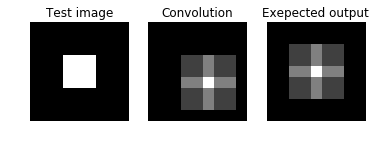

AssertionError: Your solution is not correct.

In [9]:
from filters import conv_nested

# Simple convolution kernel.
kernel = np.array(
[
    [1,0,1],
    [0,0,0],
    [1,0,1]
])

# Create a test image: a white square in the middle
test_img = np.zeros((9, 9))
test_img[3:6, 3:6] = 1

# Run your conv_nested function on the test image
test_output = conv_nested(test_img, kernel)

# Build the expected output
expected_output = np.zeros((9, 9))
expected_output[2:7, 2:7] = 1
expected_output[4, 2:7] = 2
expected_output[2:7, 4] = 2
expected_output[4, 4] = 4

# Plot the test image
plt.subplot(1,3,1)
plt.imshow(test_img)
plt.title('Test image')
plt.axis('off')

# Plot your convolved image
plt.subplot(1,3,2)
plt.imshow(test_output)
plt.title('Convolution')
plt.axis('off')

# Plot the exepected output
plt.subplot(1,3,3)
plt.imshow(expected_output)
plt.title('Exepected output')
plt.axis('off')
plt.show()

# Test if the output matches expected output
assert np.max(test_output - expected_output) < 1e-10, "Your solution is not correct."

Now let's test your `conv_nested` function on a real image.

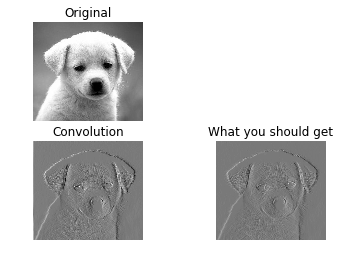

In [10]:
from filters import conv_nested

# Simple convolution kernel.
# Feel free to change the kernel and to see different outputs.
kernel = np.array(
[
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])

out = conv_nested(img, kernel)

# Plot original image
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# Plot your convolved image
plt.subplot(2,2,3)
plt.imshow(out)
plt.title('Convolution')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('convoluted_dog.jpg', as_grey=True)
plt.subplot(2,2,4)
plt.imshow(solution_img)
plt.title('What you should get')
plt.axis('off')


plt.show()

Let us implement a more efficient version of convolution using array operations in numpy. As shown in the lecture, a convolution can be considered as a sliding window that computes sum of the pixel values weighted by the flipped kernel. The faster version will i) zero-pad an image, ii) flip the kernel horizontally and vertically, and iii) compute weighted sum of the neighborhood at each pixel.

First, implement the function **`zero_pad`** in **`filters.py`**.


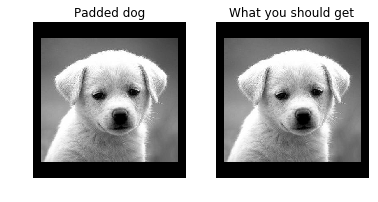

In [12]:
from filters import zero_pad

pad_width = 20 # width of the padding on the left and right
pad_height = 40 # height of the padding on the top and bottom

padded_img = zero_pad(img, pad_height, pad_width)

# Plot your padded dog
plt.subplot(1,2,1)
plt.imshow(padded_img)
plt.title('Padded dog')
plt.axis('off')

# Plot what you should get
solution_img = io.imread('padded_dog.jpg', as_grey=True)
plt.subplot(1,2,2)
plt.imshow(solution_img)
plt.title('What you should get')
plt.axis('off')

plt.show()

Next, complete the function **`conv_fast`** in **`filters.py`** using `zero_pad`. Run the code below to compare the outputs by the two implementations. `conv_fast` should run significantly faster than `conv_nested`.  
Depending on your implementation and computer, `conv_nested` should take a few seconds and `conv_fast` should be around 5 times faster.

conv_nested: took 2.127171 seconds.
conv_fast: took 0.668567 seconds.
Different outputs! Check your implementation.


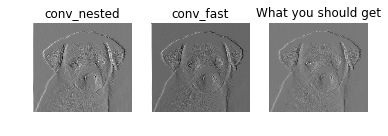

In [26]:
from filters import conv_fast

t0 = time()
out_fast = conv_fast(img, kernel)
t1 = time()
out_nested = conv_nested(img, kernel)
t2 = time()

# Compare the running time of the two implementations
print("conv_nested: took %f seconds." % (t2 - t1))
print("conv_fast: took %f seconds." % (t1 - t0))

# Plot conv_nested output
plt.subplot(1,3,1)
plt.imshow(out_nested)
plt.title('conv_nested')
plt.axis('off')

# Plot conv_fast output
plt.subplot(1,3,2)
plt.imshow(out_fast)
plt.title('conv_fast')
plt.axis('off')

solution_img = io.imread('convoluted_dog.jpg', as_grey=True)
plt.subplot(1,3,3)
plt.imshow(solution_img)
plt.title('What you should get')
plt.axis('off')

# Make sure that the two outputs are the same
if not (np.max(out_fast - out_nested) < 1e-10):
    print("Different outputs! Check your implementation.")

### Extra Credit 1 (1% of final grade)
Devise a faster version of convolution and implement **`conv_faster`** in **`filters.py`**. You will earn extra credit only if the `conv_faster` runs faster (by a fair margin) than `conv_fast` **and** outputs the same result.

conv_fast: took 0.556884 seconds.
conv_faster: took 0.000135 seconds.
Different outputs! Check your implementation.


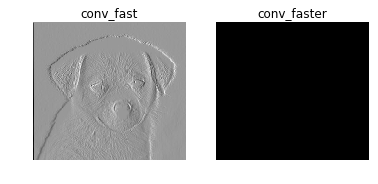

In [20]:
from filters import conv_faster

t0 = time()
out_fast = conv_fast(img, kernel)
t1 = time()
out_faster = conv_faster(img, kernel)
t2 = time()

# Compare the running time of the two implementations
print("conv_fast: took %f seconds." % (t1 - t0))
print("conv_faster: took %f seconds." % (t2 - t1))

# Plot conv_nested output
plt.subplot(1,2,1)
plt.imshow(out_fast)
plt.title('conv_fast')
plt.axis('off')

# Plot conv_fast output
plt.subplot(1,2,2)
plt.imshow(out_faster)
plt.title('conv_faster')
plt.axis('off')

# Make sure that the two outputs are the same
if not (np.max(out_fast - out_faster) < 1e-10):
    print("Different outputs! Check your implementation.")

---
## Part 2: Cross-correlation

Cross-correlation of two 2D signals $f$ and $g$ is defined as follows:
$$(f\star{g})[m,n]=\sum_{i=-\infty}^\infty\sum_{j=-\infty}^\infty f[i,j]\cdot g[i-m,j-n]$$

### 2.1 Template Matching with Cross-correlation (12 points)
Suppose that you are a clerk at a grocery store. One of your responsibilites is to check the shelves periodically and stock them up whenever there are sold-out items. You got tired of this laborious task and decided to build a computer vision system that keeps track of the items on the shelf.

Luckily, you have learned in CS131 that cross-correlation can be used for template matching: a template $g$ is multiplied with regions of a larger image $f$ to measure how similar each region is to the template.

The template of a product (`template.jpg`) and the image of shelf (`shelf.jpg`) is provided. We will use cross-correlation to find the product in the shelf.

Implement **`cross_correlation`** function in **`filters.py`** and run the code below.

*- Hint: you may use the `conv_fast` function you implemented in the previous question.*

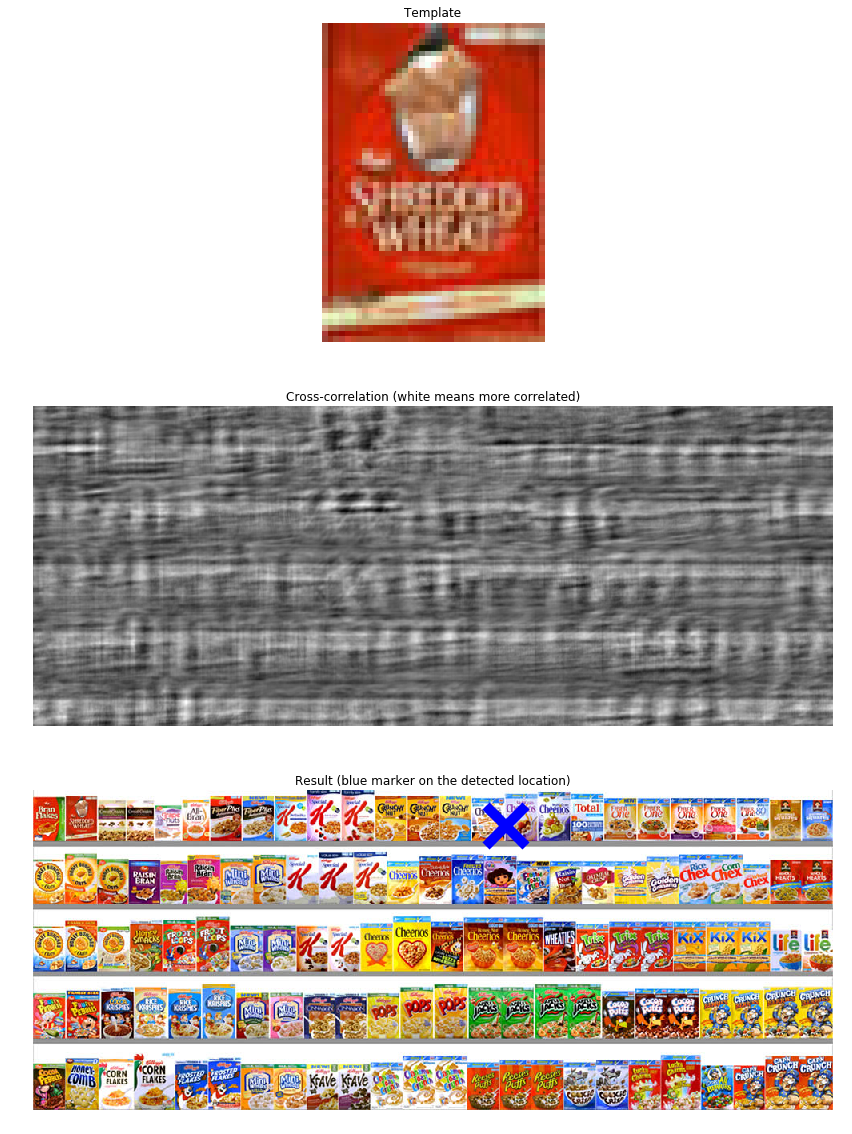

In [51]:
from filters import cross_correlation

# Load template and image in grayscale
img = io.imread('shelf.jpg')
img_grey = io.imread('shelf.jpg', as_grey=True)
temp = io.imread('template.jpg')
temp_grey = io.imread('template.jpg', as_grey=True)

# Perform cross-correlation between the image and the template
#out = cross_correlation(img_grey, temp_grey)

# Find the location with maximum similarity
y,x = (np.unravel_index(out.argmin(), out.shape))

# Display product template
plt.figure(figsize=(25,20))
plt.subplot(3, 1, 1)
plt.imshow(temp)
plt.title('Template')
plt.axis('off')

# Display cross-correlation output
plt.subplot(3, 1, 2)
plt.imshow(out)
plt.title('Cross-correlation (white means more correlated)')
plt.axis('off')

# Display image
plt.subplot(3, 1, 3)
plt.imshow(img)
plt.title('Result (blue marker on the detected location)')
plt.axis('off')

# Draw marker at detected location
plt.plot(x, y, 'bx', ms=40, mew=10)
plt.show()


#### Interpretation
How does the output of cross-correlation filter look like? Was it able to detect the product correctly? Explain what might be the problem with using raw template as a filter.

**Your Answer:** *Write your solution in this markdown cell.*

---
### 2.2 Zero-mean cross-correlation (6 points)
A solution to this problem is to subtract off the mean value of the template so that it has zero mean.

Implement **`zero_mean_cross_correlation`** function in **`filters.py`** and run the code below.

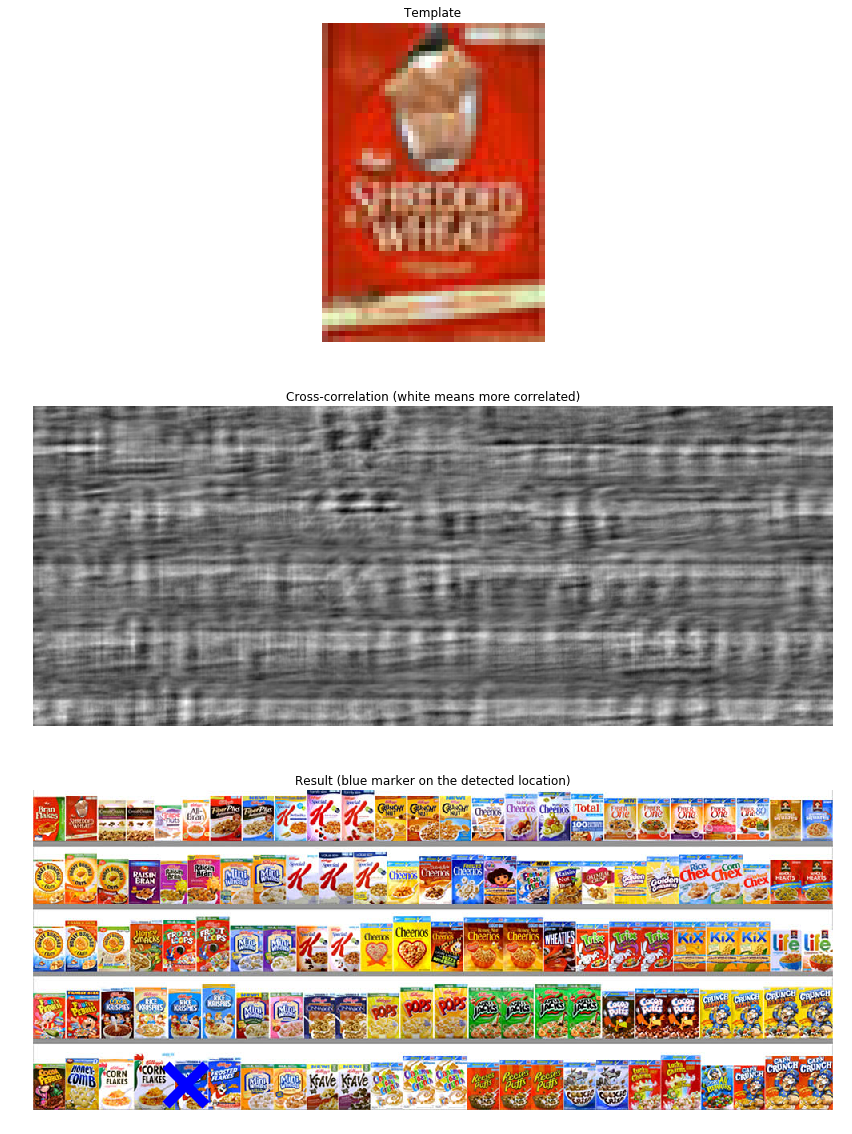

In [52]:
from filters import zero_mean_cross_correlation

# Perform cross-correlation between the image and the template
#out = zero_mean_cross_correlation(img_grey, temp_grey)

# Find the location with maximum similarity
y,x = (np.unravel_index(out.argmax(), out.shape))

# Display product template
plt.figure(figsize=(30,20))
plt.subplot(3, 1, 1)
plt.imshow(temp)
plt.title('Template')
plt.axis('off')

# Display cross-correlation output
plt.subplot(3, 1, 2)
plt.imshow(out)
plt.title('Cross-correlation (white means more correlated)')
plt.axis('off')

# Display image
plt.subplot(3, 1, 3)
plt.imshow(img)
plt.title('Result (blue marker on the detected location)')
plt.axis('off')

# Draw marker at detcted location
plt.plot(x, y, 'bx', ms=40, mew=10)
plt.show()


You can also determine whether the product is present with appropriate scaling and thresholding.

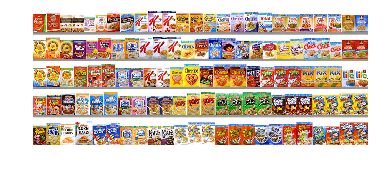

NameError: global name 'zero_mean_cross_correlation' is not defined

In [31]:
def check_product_on_shelf(shelf, product):
    out = zero_mean_cross_correlation(shelf, product)
    
    # Scale output by the size of the template
    out = out / float(product.shape[0]*product.shape[1])
    
    # Threshold output (this is arbitrary, you would need to tune the threshold for a real application)
    out = out > 0.025
    
    if np.sum(out) > 0:
        print('The product is on the shelf')
    else:
        print('The product is not on the shelf')

# Load image of the shelf without the product
img2 = io.imread('shelf_soldout.jpg')
img2_grey = io.imread('shelf_soldout.jpg', as_grey=True)

plt.imshow(img)
plt.axis('off')
plt.show()
check_product_on_shelf(img_grey, temp_grey)

plt.imshow(img2)
plt.axis('off')
plt.show()
check_product_on_shelf(img2_grey, temp_grey)

---
### 2.3 Normalized Cross-correlation (12 points)
One day the light near the shelf goes out and the product tracker starts to malfunction. The `zero_mean_cross_correlation` is not robust to change in lighting condition. The code below demonstrates this.

In [ ]:
from filters import normalized_cross_correlation

# Load image
img = io.imread('shelf_dark.jpg')
img_grey = io.imread('shelf_dark.jpg', as_grey=True)

# Perform cross-correlation between the image and the template
out = zero_mean_cross_correlation(img_grey, temp_grey)

# Find the location with maximum similarity
y,x = (np.unravel_index(out.argmax(), out.shape))

# Display image
plt.imshow(img)
plt.title('Result (red marker on the detected location)')
plt.axis('off')

# Draw marker at detcted location
plt.plot(x, y, 'rx', ms=25, mew=5)
plt.show()

A solution is to normalize the pixels of the image and template at every step before comparing them. This is called **normalized cross-correlation**.

The mathematical definition for normalized cross-correlation of $f$ and template $g$ is:
$$(f\star{g})[m,n]=\sum_{i,j} \frac{f[i,j]-\overline{f_{m,n}}}{\sigma_{f_{m,n}}} \cdot \frac{g[i-m,j-n]-\overline{g}}{\sigma_g}$$

where:
- $f_{m,n}$ is the patch image at position $(m,n)$
- $\overline{f_{m,n}}$ is the mean of the patch image $f_{m,n}$
- $\sigma_{f_{m,n}}$ is the standard deviation of the patch image $f_{m,n}$ 
- $\overline{g}$ is the mean of the template $g$
- $\sigma_g$ is the standard deviation of the template $g$

Implement **`normalized_cross_correlation`** function in **`filters.py`** and run the code below.

In [ ]:
from filters import normalized_cross_correlation

# Perform normalized cross-correlation between the image and the template
out = normalized_cross_correlation(img_grey, temp_grey)

# Find the location with maximum similarity
y,x = (np.unravel_index(out.argmax(), out.shape))

# Display image
plt.imshow(img)
plt.title('Result (red marker on the detected location)')
plt.axis('off')

# Draw marker at detcted location
plt.plot(x, y, 'rx', ms=25, mew=5)
plt.show()

## Part 3: Separable Filters

### 3.1 Theory (10 points)
Consider a $M_1\times{N_1}$ image $I$ and a $M_2\times{N_2}$ filter $F$. A filter $F$ is **separable** if it can be written as a product of two 1D filters: $F=F_1F_2$.

For example,
$$F=
\begin{bmatrix}
1 & -1 \\
1 & -1
\end{bmatrix}
$$
can be written as a matrix product of
$$F_1=
\begin{bmatrix}
1  \\
1
\end{bmatrix},
F_2=
\begin{bmatrix}
1 & -1
\end{bmatrix}
$$
Therefore $F$ is a separable filter.

Prove that for any separable filter $F=F_1F_2$,
$$I*F=(I*F_1)*F_2$$

**Your Answer:** *rly ok [LaTex equations](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html).*

### 3.2 Complexity comparison (10 points)
(i) How many multiplications do you need to do a direct 2D convolution (i.e. $I*F$?)<br>
(ii) How many multiplications do you need to do 1D convolutions on rows and columns (i.e. $(I*F_1)*F_2$)<br>
(iii) Use Big-O notation to argue which one is more efficient in general: direct 2D convolution or two successive 1D convolutions?

**Your Answer:** *Write your solution in this markdown cell. Please write your equations in [LaTex equations](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html).*

Now, we will empirically compare the running time of a separable 2D convolution and its equivalent two 1D convolutions. Gaussian kernel, widely used for blurring images, is one example of a separable filter. Run the code below to see its effect.

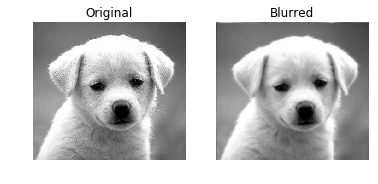

In [33]:
# Load image
img = io.imread('dog.jpg', as_grey=True)

# 5x5 Gaussian blur
kernel = np.array(
[
    [1,4,6,4,1],
    [4,16,24,16,4],
    [6,24,36,24,6],
    [4,16,24,16,4],
    [1,4,6,4,1]
])

t0 = time()
out = conv_nested(img, kernel)
t1 = time()
t_normal = t1 - t0

# Plot original image
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# Plot convolved image
plt.subplot(1,2,2)
plt.imshow(out)
plt.title('Blurred')
plt.axis('off')

plt.show()

In the below code cell, define the two 1D arrays (`k1` and `k2`) whose product is equal to the Gaussian kernel.

In [45]:
# The kernel can be written as outer product of two 1D filters
k1 = None  # shape (5, 1)
k2 = None  # shape (1, 5)

### YOUR CODE HERE
k1 = np.array([[1,4,6,4,1]])
k2 = np.array([[1],[4],[6],[4],[1]])

### END YOUR CODE
# Check if kernel is product of k1 and k2
if not  np.all(k1 * k2 == kernel):
    print('k1 * k2 is not equal to kernel')
    


We now apply the two versions of convolution to the same image, and compare their running time. Note that the outputs of the two convolutions must be the same.

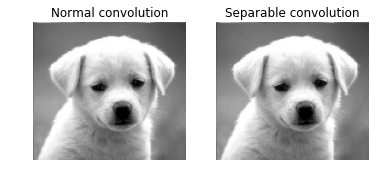

Normal convolution: took 5.789884 seconds.
Separable convolution: took 2.463078 seconds.


In [46]:
# Perform two convolutions using k1 and k2
t0 = time()
out_separable = conv_nested(img, k1)
out_separable = conv_nested(out_separable, k2)
t1 = time()
t_separable = t1 - t0

# Plot normal convolution image
plt.subplot(1,2,1)
plt.imshow(out)
plt.title('Normal convolution')
plt.axis('off')

# Plot separable convolution image
plt.subplot(1,2,2)
plt.imshow(out_separable)
plt.title('Separable convolution')
plt.axis('off')

plt.show()

print("Normal convolution: took %f seconds." % (t_normal))
print("Separable convolution: took %f seconds." % (t_separable))

In [47]:
# Check if the two outputs are equal
assert np.max(out_separable - out) < 1e-10